In [ ]:
!pip install --upgrade scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 23.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
pip install pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.1 MB/s eta 0:00:00


In [ ]:
!pip install numpy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error ,mean_absolute_error
from math import  sqrt
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
import statistics as st
from scipy.stats import mode, skew, kurtosis
import seaborn as sns
import random
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, SimpleRNN
from keras.layers import LSTM
from keras.layers import Dropout


import pandas as pd
import joblib
import matplotlib.pyplot as plt
import math

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

from keras.models import Sequential
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import SimpleRNN, Embedding
from tensorflow.keras.preprocessing import sequence
from keras.layers import Dense, LSTM, RNN, GRU, Dropout, Activation
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import skew, kurtosis

from torch import nn
from torch.utils.data import DataLoader, Dataset
from datetime import datetime, timedelta
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings("ignore")

In [ ]:
eth_df = pd.read_csv("/content/BNB-Historical-Data.csv")
eth_df

,Date,Price,Open,High,Low,Vol.,Change %
0,03/01/2024,407.30,399.10,408.48,399.00,595.45K,2.05%
1,02/29/2024,399.10,414.62,419.38,391.24,1.16M,-3.74%
2,02/28/2024,414.62,394.60,426.79,394.30,1.39M,5.02%
3,02/27/2024,394.80,401.60,403.69,390.11,932.13K,-1.69%
4,02/26/2024,401.60,388.50,404.49,382.10,1.23M,3.37%
...,...,...,...,...,...,...,...
1823,03/05/2019,13.65,11.40,13.74,11.40,8.34M,19.61%
1824,03/04/2019,11.41,11.45,11.51,10.88,2.74M,-0.29%
1825,03/03/2019,11.45,11.75,11.86,11.20,2.86M,-2.58%
1826,03/02/2019,11.75,11.35,11.80,10.83,3.89M,3.56%


###Data processing

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from tqdm import tqdm_notebook
from itertools import product
from typing import Union

from IPython.display import display
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

RANDOM_SEED = np.random.seed(0)

In [ ]:
eth_df['Date'] = pd.to_datetime(eth_df['Date'])
eth_df.reset_index(drop=True)
eth_df.set_index('Date', inplace=True)
eth_df.sort_index(ascending=True, inplace=True)

In [ ]:
# Hàm để chuyển đổi giá trị có 'K', 'M', hoặc 'B' thành số thực.
def convert_volume(value):
    if 'K' in value:
        return float(value.replace('K', '')) * 1e3
    elif 'M' in value:
        return float(value.replace('M', '')) * 1e6
    elif 'B' in value:
        return float(value.replace('B', '')) * 1e9
    else:
        return float(value)

# Áp dụng hàm cho mỗi giá trị trong cột 'Vol.'.
eth_df['Vol.'] = eth_df['Vol.'].apply(convert_volume)

In [ ]:
# Hàm để chuyển đổi giá trị có dấu % thành số thực.
def convert_percent_to_float(value):
    return float(value.replace('%', '')) / 100

# Giả sử etr_df là DataFrame của bạn với cột 'Percentage' cần được chuyển đổi.
# etr_df['Percentage'] = ...

# Áp dụng hàm cho mỗi giá trị trong cột 'Percentage'.
eth_df['Change %'] = eth_df['Change %'].apply(convert_percent_to_float)


In [ ]:
eth_df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-03-01,11.35,10.27,11.55,10.24,4020000.0,0.1045
2019-03-02,11.75,11.35,11.80,10.83,3890000.0,0.0356
2019-03-03,11.45,11.75,11.86,11.20,2860000.0,-0.0258
2019-03-04,11.41,11.45,11.51,10.88,2740000.0,-0.0029
2019-03-05,13.65,11.40,13.74,11.40,8340000.0,0.1961
...,...,...,...,...,...,...
2024-02-26,401.60,388.50,404.49,382.10,1230000.0,0.0337
2024-02-27,394.80,401.60,403.69,390.11,932130.0,-0.0169
2024-02-28,414.62,394.60,426.79,394.30,1390000.0,0.0502


In [ ]:
eth_df['Price'] = eth_df['Price'].astype(str).str.replace(',', '').astype(float)
eth_df['Open'] = eth_df['Open'].astype(str).str.replace(',', '').astype(float)
eth_df['High'] = eth_df['High'].astype(str).str.replace(',', '').astype(float)
eth_df['Low'] = eth_df['Low'].astype(str).str.replace(',', '').astype(float)


In [ ]:
#eth_df['Price'] = eth_df['Price'].str.replace(',', '').astype(float)
#eth_df['Open'] = eth_df['Open'].str.replace(',', '').astype(float)
#eth_df['High'] =eth_df['High'].str.replace(',', '').astype(float)
#eth_df['Low'] = eth_df['Low'].str.replace(',', '').astype(float)
#eth_df

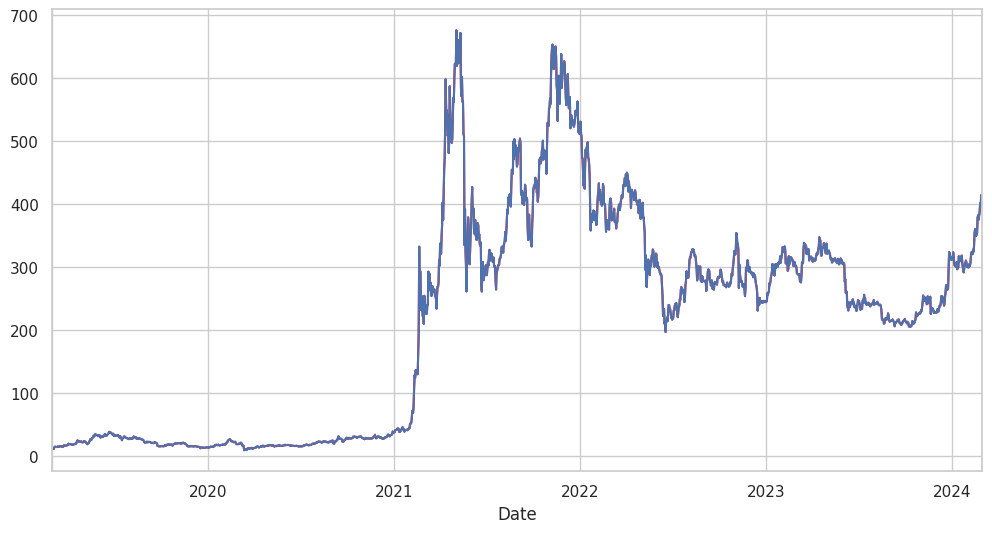

In [ ]:
eth_df['Price'].plot(figsize=(12,6),color='red')

plt.plot(eth_df['Price'])

In [ ]:
eth_df['Price']

Date
2019-03-01     11.35
2019-03-02     11.75
2019-03-03     11.45
2019-03-04     11.41
2019-03-05     13.65
               ...  
2024-02-26    401.60
2024-02-27    394.80
2024-02-28    414.62
2024-02-29    399.10
2024-03-01    407.30
Name: Price, Length: 1828, dtype: float64

###Split data 6:4



In [ ]:
window_size = 10
feature_dim = 5

train_size = 0.6
test_size = 0.4

# model params
lstm_neurons = 20
rnn_neurons = 20
epochs = 100
batch_size = 4
loss = 'mae'
dropout = 0.25
optimizer = 'adam'

In [ ]:
train_index = int(len(eth_df)*train_size)
train_index

1096

In [ ]:
eth_df_train = eth_df.iloc[:train_index]
eth_df_test  = eth_df[train_index:]

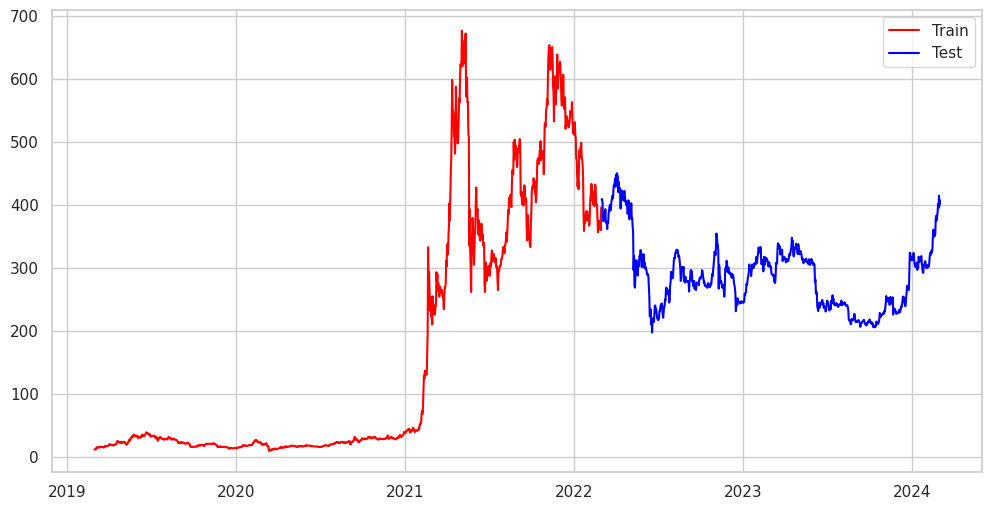

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(eth_df_train).index.to_list(), pd.DataFrame(eth_df_train['Price']), color='red', label='Train')
plt.plot(pd.DataFrame(eth_df_test).index.to_list(),pd.DataFrame(eth_df_test['Price']),color='blue' ,label ='Test')
plt.legend()
plt.show()

In [ ]:
eth_df['Price_diff'] = eth_df['Price'].diff(periods=7)
eth_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1828 entries, 2019-03-01 to 2024-03-01
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       1828 non-null   float64
 1   Open        1828 non-null   float64
 2   High        1828 non-null   float64
 3   Low         1828 non-null   float64
 4   Vol.        1828 non-null   float64
 5   Change %    1828 non-null   float64
 6   Price_diff  1821 non-null   float64
dtypes: float64(7)
memory usage: 114.2 KB


In [ ]:
eth_df

,Price,Open,High,Low,Vol.,Change %,Price_diff
Date,,,,,,,
2019-03-01,11.35,10.27,11.55,10.24,4020000.0,0.1045,NaN
2019-03-02,11.75,11.35,11.80,10.83,3890000.0,0.0356,NaN
2019-03-03,11.45,11.75,11.86,11.20,2860000.0,-0.0258,NaN
2019-03-04,11.41,11.45,11.51,10.88,2740000.0,-0.0029,NaN
2019-03-05,13.65,11.40,13.74,11.40,8340000.0,0.1961,NaN
...,...,...,...,...,...,...,...
2024-02-26,401.60,388.50,404.49,382.10,1230000.0,0.0337,49.90
2024-02-27,394.80,401.60,403.69,390.11,932130.0,-0.0169,40.29
2024-02-28,414.62,394.60,426.79,394.30,1390000.0,0.0502,35.53


In [ ]:
eth_df['Price_diff'].fillna(method='backfill', inplace=True)

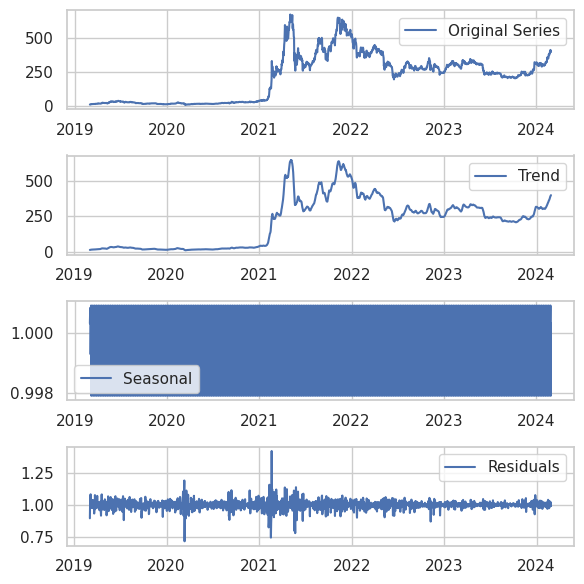

In [ ]:
result = seasonal_decompose(eth_df['Price'], model='multiplicative', period=7)
trend = result.trend.dropna()
seasonal = result.seasonal.dropna()
residual = result.resid.dropna()

# Plot the decomposed components
plt.figure(figsize=(6,6))

plt.subplot(4, 1, 1)
plt.plot(eth_df['Price'], label='Original Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()
# for fun i guess

In [ ]:
eth_df['month_index'] = eth_df.index.month
eth_df

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-01,11.35,10.27,11.55,10.24,4020000.0,0.1045,2.94,3
2019-03-02,11.75,11.35,11.80,10.83,3890000.0,0.0356,2.94,3
2019-03-03,11.45,11.75,11.86,11.20,2860000.0,-0.0258,2.94,3
2019-03-04,11.41,11.45,11.51,10.88,2740000.0,-0.0029,2.94,3
2019-03-05,13.65,11.40,13.74,11.40,8340000.0,0.1961,2.94,3
...,...,...,...,...,...,...,...,...
2024-02-26,401.60,388.50,404.49,382.10,1230000.0,0.0337,49.90,2
2024-02-27,394.80,401.60,403.69,390.11,932130.0,-0.0169,40.29,2
2024-02-28,414.62,394.60,426.79,394.30,1390000.0,0.0502,35.53,2


In [ ]:
df_monthly = eth_df.resample('M').mean()
df_monthly

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-31,14.959677,14.726129,15.253226,14.264194,3.721935e+06,0.018713,1.563871,3.0
2019-04-30,20.614333,20.463333,21.153667,19.689000,2.790667e+06,0.008660,1.350000,4.0
2019-05-31,26.913548,26.549677,27.769032,25.404194,3.359355e+06,0.014574,2.434194,5.0
2019-06-30,33.775333,33.800667,34.811000,32.650333,4.799000e+06,0.000087,0.433667,6.0
2019-07-31,30.068387,30.212258,31.141935,29.064839,3.515161e+06,-0.003690,-1.652903,7.0
...,...,...,...,...,...,...,...,...
2023-11-30,239.862333,239.832667,245.126000,234.689333,8.798903e+05,0.000637,1.136667,11.0
2023-12-31,259.653871,256.931613,263.784516,252.357097,1.038261e+06,0.010677,17.512581,12.0
2024-01-31,307.616774,308.002903,313.546129,300.821613,8.590026e+05,-0.000990,-0.954516,1.0


<Axes: xlabel='Date'>

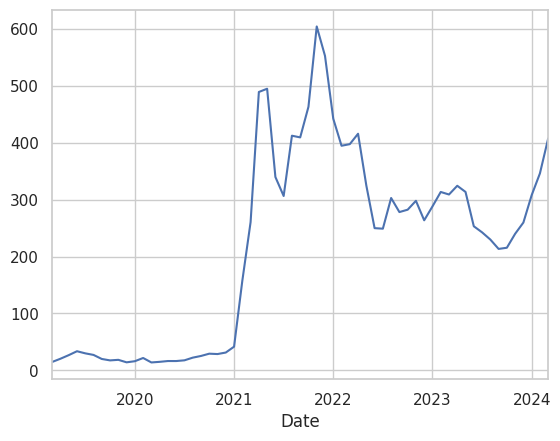

In [ ]:
df_monthly['Price'].plot()

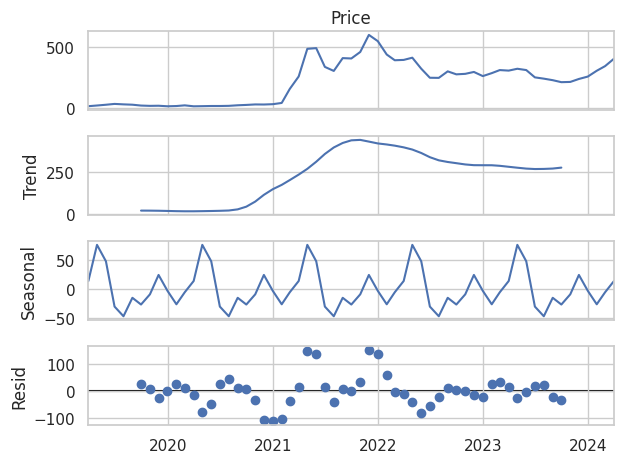

In [ ]:
decompose = seasonal_decompose(df_monthly['Price'])
decompose.plot()

plt.show()

In [ ]:
#import pmdarima as pm
#model = pm.auto_arima(df_monthly['Price'], trace = True,start_P=0, seasonal=True,exogenous=eth_df['month_index'],
					#	d=None, D=1,m=12,
				#		error_action='ignore',
					#	suppress_warnings=True,
				#		stepwise=True)

In [ ]:
import pmdarima as pm
model = pm.auto_arima(eth_df['Price'], trace = True,start_P=0, seasonal=True,exogenous=eth_df['month_index'],
						d=None, D=1,m=7,max_p=3, max_d=2, max_q=3,
						error_action='ignore',
						suppress_warnings=True,
						stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,1,1)[7] intercept   : AIC=inf, Time=14.69 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=17924.930, Time=0.10 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=15311.882, Time=2.56 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=16829.497, Time=3.20 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=17926.560, Time=0.11 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=15703.428, Time=0.46 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=15023.518, Time=6.94 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=11.24 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=4.70 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=17909.289, Time=2.85 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=15005.250, Time=12.03 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=15286.636, Time=3.56 sec
 ARIMA(2,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=19.38 sec
 ARIMA(2,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=5.58 sec
 ARIMA(3,0,0)(2,1,0)[7] intercept   : AIC=149

In [ ]:
train = eth_df_train['Price']
test = eth_df_test['Price']
start = len(train)
end = len(train) +len(test) -1
model_sarimax = sm.tsa.statespace.SARIMAX(eth_df['Price'],
                                          order = (4,0,1),
                                          seasonal_order = (2,1,0,7))
result = model_sarimax.fit()

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Price   No. Observations:                 1828
Model:             SARIMAX(4, 0, 1)x(2, 1, [], 7)   Log Likelihood               -7480.329
Date:                            Tue, 18 Jun 2024   AIC                          14976.658
Time:                                    04:16:01   BIC                          15020.715
Sample:                                03-01-2019   HQIC                         14992.912
                                     - 03-01-2024                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0627      0.227      4.690      0.000       0.619       1.507
ar.L2          0.0342      0.195      0.175      0.861      -0.349       0.417
ar.L3         -0.1270      0.050     -2.526      0.012      -0.226      -0.028
ar.L4         -0.0232      0.033     -0.698      0.485      -0.088       0.042
ma.L1         -0.2195      0.226     -0.972      0.331      -0.662       0.223
ar.S.L7       -0.6332      0.008    -77.959      0.000      -0.649      -0.617
ar.S.L14      -0.3781      0.009    -40.661      0.000      -0.396      -0.360
sigma2       215.9213      2.592     83.289      0.000     210.840     221.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             21347.80
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):              62.60   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
predictions = result.predict(start, end)
predictions

2022-03-01    395.278170
2022-03-02    413.206907
2022-03-03    400.970466
2022-03-04    400.814690
2022-03-05    379.363912
                 ...    
2024-02-26    385.596181
2024-02-27    397.512650
2024-02-28    405.949282
2024-02-29    419.510007
2024-03-01    399.697768
Freq: D, Name: predicted_mean, Length: 732, dtype: float64

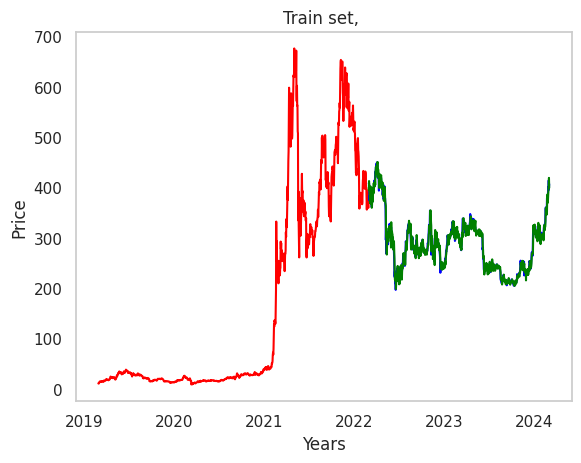

In [ ]:
plt.plot(train, color = "red")
plt.plot(test, color = "blue")
plt.plot(predictions, color = "green")

# title and axis captions
plt.title("Train set, ")
plt.ylabel("Price")
plt.xlabel('Years')

# add a grid
plt.grid()

plt.show()

In [ ]:
test.shape

(732,)

In [ ]:
predictions.shape

(732,)

In [ ]:
from sklearn.metrics import mean_squared_error


print('MAPE = ', mean_absolute_percentage_error(test, predictions))
print('MAE = ', mean_absolute_error(test, predictions))
print('RMSE = ', np.sqrt(mean_squared_error(test, predictions)))

MAPE =  0.019215145578253948
MAE =  5.348376222232042
RMSE =  7.6468332571410365


In [ ]:
start = len(eth_df)

end = (len(eth_df) - 1) + 30

forecast_30 = result.predict(start, end)

In [ ]:
start = len(eth_df)


end = (len(eth_df) - 1) + 60


forecast_60 = result.predict(start, end)

In [ ]:
start = len(eth_df)


end = (len(eth_df) - 1) + 90


forecast_90 = result.predict(start, end)

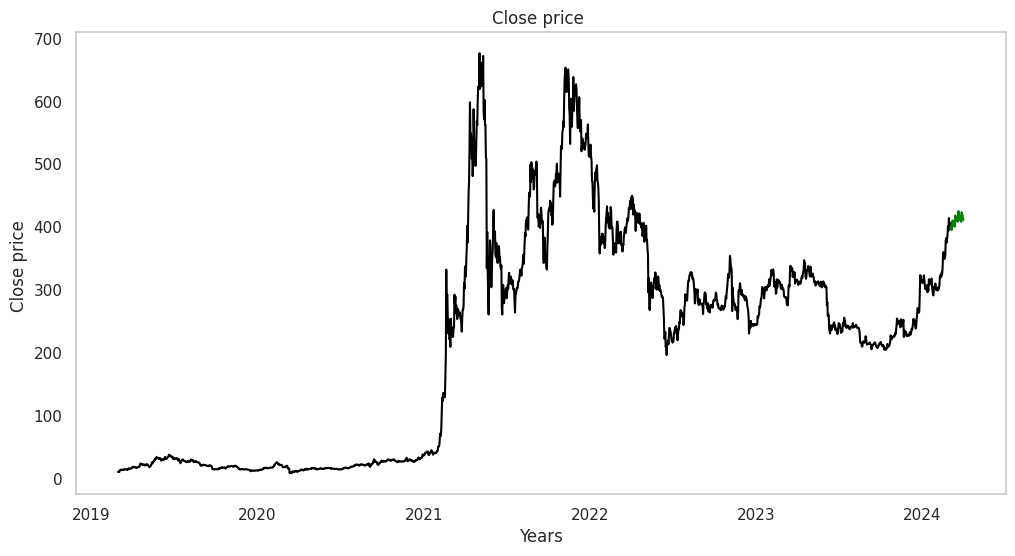

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(eth_df['Price'], color = 'black')
plt.plot(forecast_30, color = 'green')

# title and axis captions
plt.title("Close price ")
plt.ylabel("Close price ")
plt.xlabel('Years')

# add a grid
plt.grid()

plt.show()

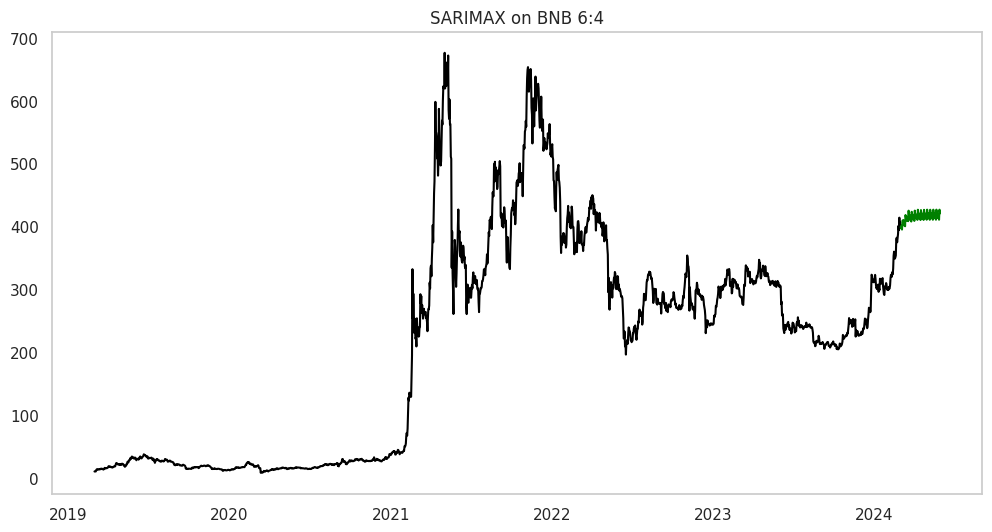

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(eth_df['Price'], color = 'black')
plt.plot(forecast_90, color = 'green')

# title and axis captions
#plt.title("Close price ")
#plt.ylabel("Close price ")
#plt.xlabel('Years')

# add a grid
plt.title("SARIMAX on BNB 6:4")
plt.grid()

plt.show()

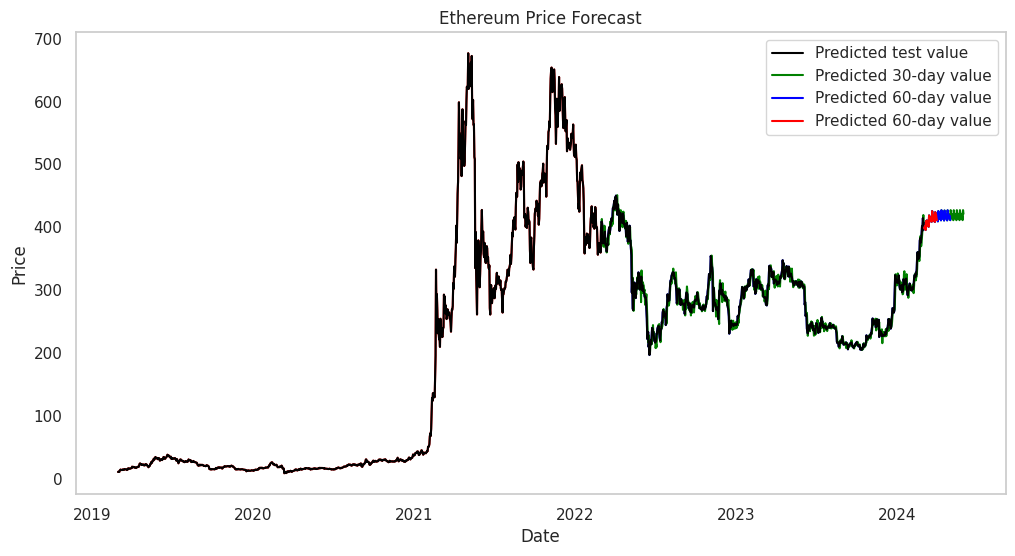

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(train, color = "red")
plt.plot(test, color = "blue")
plt.plot(predictions, color = "green")

# title and axis captions
plt.title("Train set, ")
plt.ylabel("Price")
plt.xlabel('Years')


plt.plot(eth_df['Price'], color = 'black', label='Predicted test value')
plt.plot(forecast_90, color = 'green', label='Predicted 30-day value')
plt.plot(forecast_60, color = 'blue', label='Predicted 60-day value')
plt.plot(forecast_30, color = 'red', label='Predicted 60-day value')

# title and axis captions
plt.title("Ethereum Price Forecast")
plt.ylabel("Price")
plt.xlabel('Date')

# add a legend
plt.legend()

# add a grid
plt.grid()

# display the plot
plt.show()


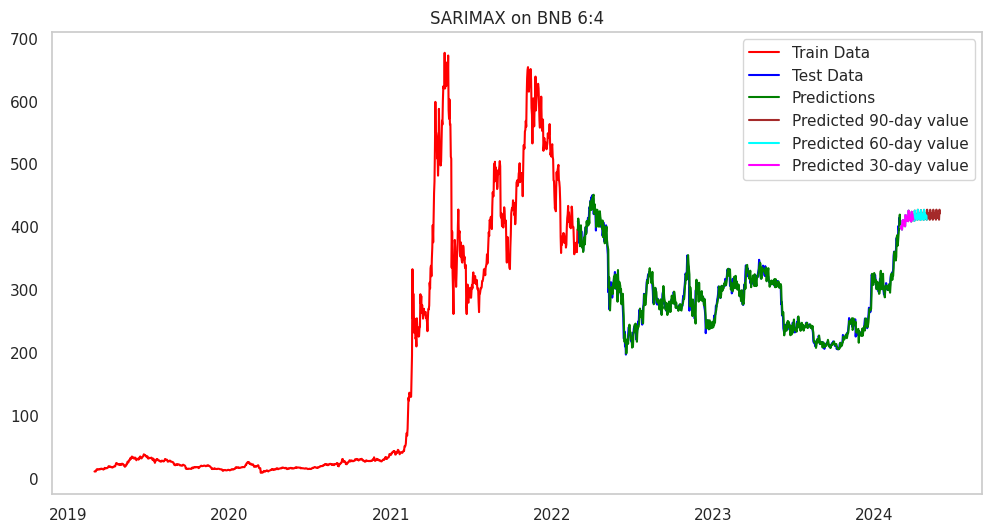

In [ ]:
plt.figure(figsize=(12, 6))

# Vẽ dữ liệu train, test và predictions
plt.plot(train, color = "red", label='Train Data')
plt.plot(test, color = "blue", label='Test Data')
plt.plot(predictions, color = "green", label='Predictions')

# Vẽ dữ liệu giá Ethereum và các dự báo
#plt.plot(eth_df['Price'], color = 'black', label='Actual Price')
plt.plot(forecast_90, color = 'brown', label='Predicted 90-day value')
plt.plot(forecast_60, color = 'cyan', label='Predicted 60-day value')
plt.plot(forecast_30, color = 'magenta', label='Predicted 30-day value')

# Thiết lập tiêu đề và nhãn cho trục
plt.title("SARIMAX on BNB 6:4")
#plt.ylabel("Price")
#plt.xlabel('Date')

# Thêm chú giải
plt.legend()

# Thêm lưới
plt.grid()

# Hiển thị biểu đồ
plt.show()


###Split data 7:3

In [ ]:
window_size = 10
feature_dim = 5

train_size = 0.7
test_size = 0.3

# model params
lstm_neurons = 20
rnn_neurons = 20
epochs = 100
batch_size = 4
loss = 'mae'
dropout = 0.25
optimizer = 'adam'

In [ ]:
train_index = int(len(eth_df)*train_size)
train_index

1279

In [ ]:
eth_df_train = eth_df.iloc[:train_index]
eth_df_test  = eth_df[train_index:]

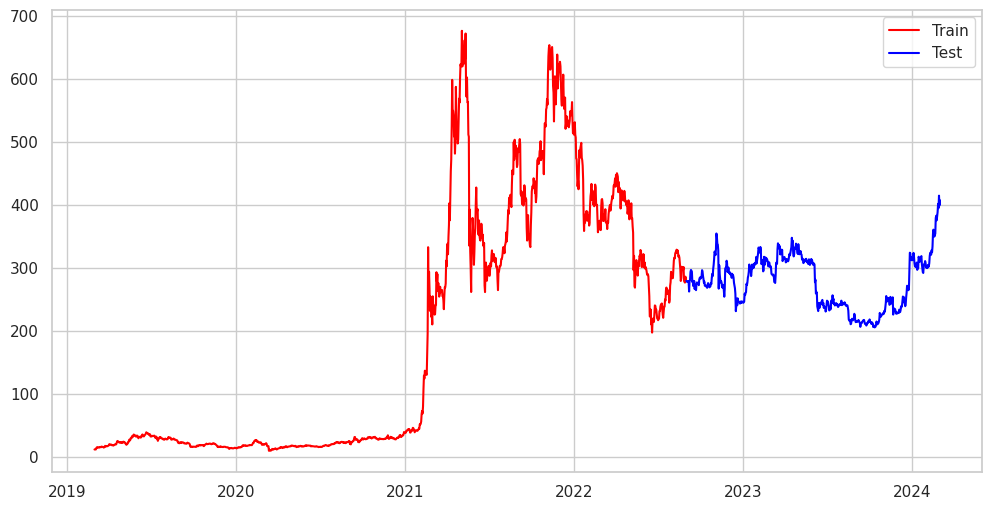

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(eth_df_train).index.to_list(), pd.DataFrame(eth_df_train['Price']), color='red', label='Train')
plt.plot(pd.DataFrame(eth_df_test).index.to_list(),pd.DataFrame(eth_df_test['Price']),color='blue' ,label ='Test')
plt.legend()
plt.show()

In [ ]:
eth_df['Price_diff'] = eth_df['Price'].diff(periods=7)
eth_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1828 entries, 2019-03-01 to 2024-03-01
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        1828 non-null   float64
 1   Open         1828 non-null   float64
 2   High         1828 non-null   float64
 3   Low          1828 non-null   float64
 4   Vol.         1828 non-null   float64
 5   Change %     1828 non-null   float64
 6   Price_diff   1821 non-null   float64
 7   month_index  1828 non-null   int32  
dtypes: float64(7), int32(1)
memory usage: 121.4 KB


In [ ]:
eth_df

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-01,11.35,10.27,11.55,10.24,4020000.0,0.1045,NaN,3
2019-03-02,11.75,11.35,11.80,10.83,3890000.0,0.0356,NaN,3
2019-03-03,11.45,11.75,11.86,11.20,2860000.0,-0.0258,NaN,3
2019-03-04,11.41,11.45,11.51,10.88,2740000.0,-0.0029,NaN,3
2019-03-05,13.65,11.40,13.74,11.40,8340000.0,0.1961,NaN,3
...,...,...,...,...,...,...,...,...
2024-02-26,401.60,388.50,404.49,382.10,1230000.0,0.0337,49.90,2
2024-02-27,394.80,401.60,403.69,390.11,932130.0,-0.0169,40.29,2
2024-02-28,414.62,394.60,426.79,394.30,1390000.0,0.0502,35.53,2


In [ ]:
eth_df['Price_diff'].fillna(method='backfill', inplace=True)

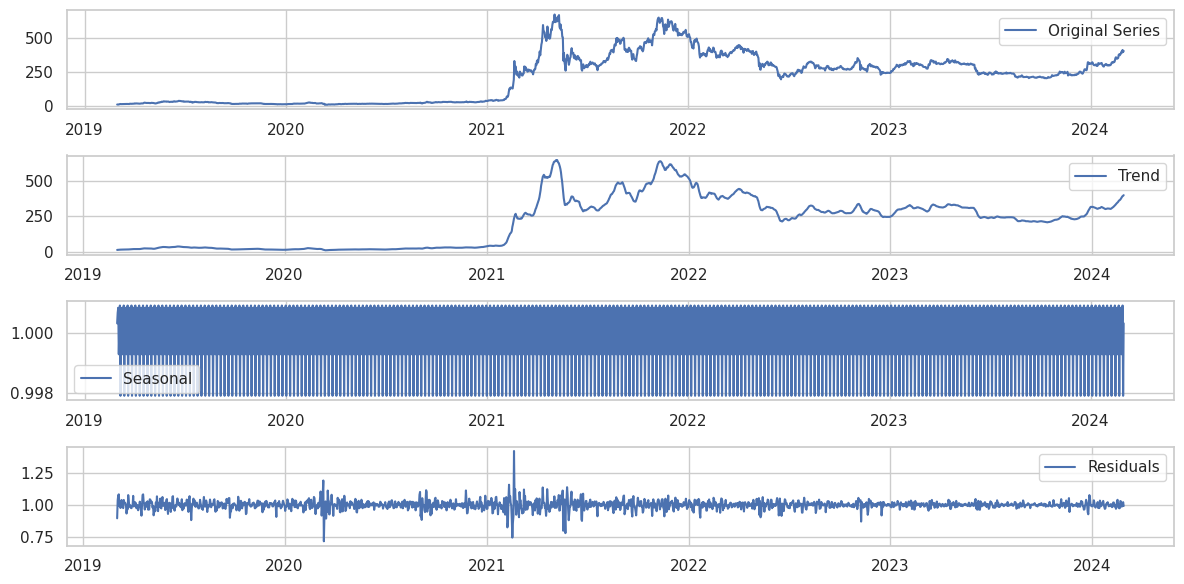

In [ ]:
result = seasonal_decompose(eth_df['Price'], model='multiplicative', period=7)
trend = result.trend.dropna()
seasonal = result.seasonal.dropna()
residual = result.resid.dropna()

# Plot the decomposed components
plt.figure(figsize=(12,6))

plt.subplot(4, 1, 1)
plt.plot(eth_df['Price'], label='Original Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()
# for fun i guess

In [ ]:
eth_df['month_index'] = eth_df.index.month
eth_df

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-01,11.35,10.27,11.55,10.24,4020000.0,0.1045,2.94,3
2019-03-02,11.75,11.35,11.80,10.83,3890000.0,0.0356,2.94,3
2019-03-03,11.45,11.75,11.86,11.20,2860000.0,-0.0258,2.94,3
2019-03-04,11.41,11.45,11.51,10.88,2740000.0,-0.0029,2.94,3
2019-03-05,13.65,11.40,13.74,11.40,8340000.0,0.1961,2.94,3
...,...,...,...,...,...,...,...,...
2024-02-26,401.60,388.50,404.49,382.10,1230000.0,0.0337,49.90,2
2024-02-27,394.80,401.60,403.69,390.11,932130.0,-0.0169,40.29,2
2024-02-28,414.62,394.60,426.79,394.30,1390000.0,0.0502,35.53,2


In [ ]:
df_monthly = eth_df.resample('M').mean()
df_monthly

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-31,14.959677,14.726129,15.253226,14.264194,3.721935e+06,0.018713,1.563871,3.0
2019-04-30,20.614333,20.463333,21.153667,19.689000,2.790667e+06,0.008660,1.350000,4.0
2019-05-31,26.913548,26.549677,27.769032,25.404194,3.359355e+06,0.014574,2.434194,5.0
2019-06-30,33.775333,33.800667,34.811000,32.650333,4.799000e+06,0.000087,0.433667,6.0
2019-07-31,30.068387,30.212258,31.141935,29.064839,3.515161e+06,-0.003690,-1.652903,7.0
...,...,...,...,...,...,...,...,...
2023-11-30,239.862333,239.832667,245.126000,234.689333,8.798903e+05,0.000637,1.136667,11.0
2023-12-31,259.653871,256.931613,263.784516,252.357097,1.038261e+06,0.010677,17.512581,12.0
2024-01-31,307.616774,308.002903,313.546129,300.821613,8.590026e+05,-0.000990,-0.954516,1.0


<Axes: xlabel='Date'>

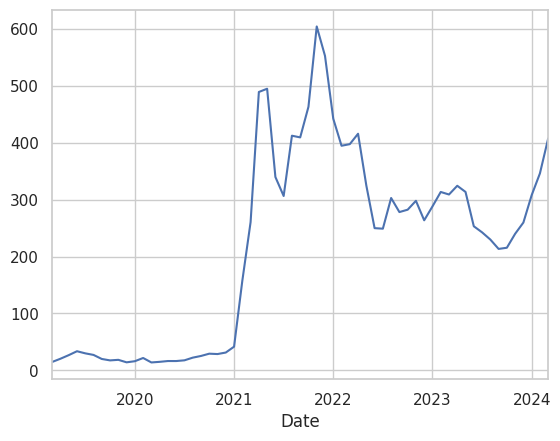

In [ ]:
df_monthly['Price'].plot()

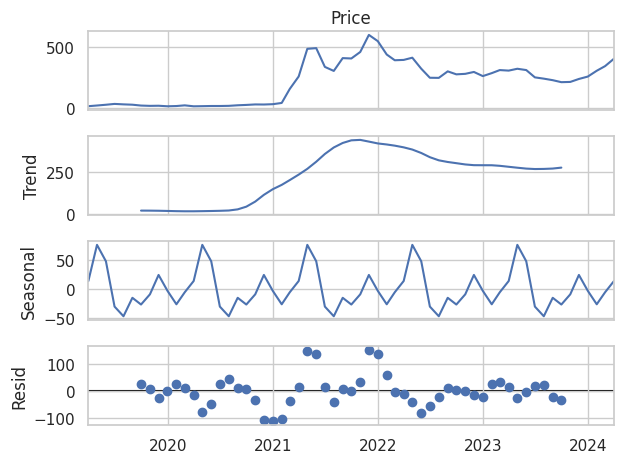

In [ ]:
decompose = seasonal_decompose(df_monthly['Price'])
decompose.plot()

plt.show()

In [ ]:
#import pmdarima as pm
#model = pm.auto_arima(df_monthly['Price'], trace = True,start_P=0, seasonal=True,exogenous=eth_df['month_index'],
					#	d=None, D=1,m=12,
				#		error_action='ignore',
					#	suppress_warnings=True,
				#		stepwise=True)

In [ ]:
import pmdarima as pm
model = pm.auto_arima(eth_df['Price'], trace = True,start_P=0, seasonal=True,exogenous=eth_df['month_index'],
						d=None, D=1,m=7,max_p=3, max_d=2, max_q=3,
						error_action='ignore',
						suppress_warnings=True,
						stepwise=True)

In [ ]:
train = eth_df_train['Price']
test = eth_df_test['Price']
start = len(train)
end = len(train) +len(test) -1
model_sarimax = sm.tsa.statespace.SARIMAX(eth_df['Price'],
                                          order = (4,0,1),
                                          seasonal_order = (2,1,0,7))
result = model_sarimax.fit()

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Price   No. Observations:                 1828
Model:             SARIMAX(4, 0, 1)x(2, 1, [], 7)   Log Likelihood               -7480.329
Date:                            Tue, 18 Jun 2024   AIC                          14976.658
Time:                                    08:56:45   BIC                          15020.715
Sample:                                03-01-2019   HQIC                         14992.912
                                     - 03-01-2024                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0627      0.227      4.690      0.000       0.619       1.507
ar.L2          0.0342      0.195      0.175      0.861      -0.349       0.417
ar.L3         -0.1270      0.050     -2.526      0.012      -0.226      -0.028
ar.L4         -0.0232      0.033     -0.698      0.485      -0.088       0.042
ma.L1         -0.2195      0.226     -0.972      0.331      -0.662       0.223
ar.S.L7       -0.6332      0.008    -77.959      0.000      -0.649      -0.617
ar.S.L14      -0.3781      0.009    -40.661      0.000      -0.396      -0.360
sigma2       215.9213      2.592     83.289      0.000     210.840     221.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             21347.80
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):              62.60   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
predictions = result.predict(start, end)
predictions

2022-08-31    282.819487
2022-09-01    278.885827
2022-09-02    268.828211
2022-09-03    277.307875
2022-09-04    282.036394
                 ...    
2024-02-26    385.596181
2024-02-27    397.512650
2024-02-28    405.949282
2024-02-29    419.510007
2024-03-01    399.697768
Freq: D, Name: predicted_mean, Length: 549, dtype: float64

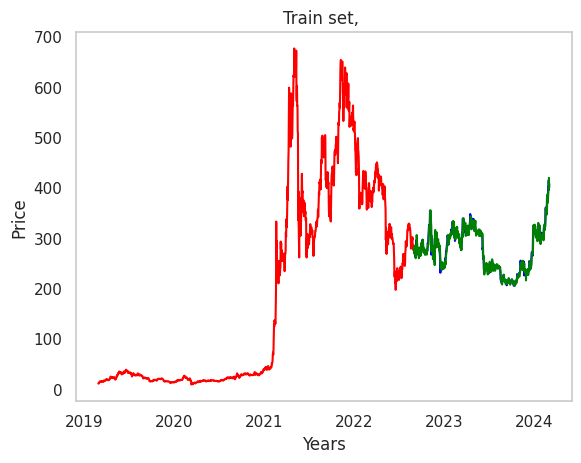

In [ ]:
plt.plot(train, color = "red")
plt.plot(test, color = "blue")
plt.plot(predictions, color = "green")

# title and axis captions
plt.title("Train set, ")
plt.ylabel("Price")
plt.xlabel('Years')

# add a grid
plt.grid()

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error


print('MAPE = ', mean_absolute_percentage_error(test, predictions))
print('MAE = ', mean_absolute_error(test, predictions))
print('RMSE = ', np.sqrt(mean_squared_error(test, predictions)))

MAPE =  0.0214631146822434
MAE =  6.044218400294628
RMSE =  8.777685492047121


In [ ]:
start = len(eth_df)

end = (len(eth_df) - 1) + 30

forecast_30 = result.predict(start, end)

In [ ]:
start = len(eth_df)


end = (len(eth_df) - 1) + 60


forecast_60 = result.predict(start, end)

In [ ]:
start = len(eth_df)


end = (len(eth_df) - 1) + 90


forecast_90 = result.predict(start, end)

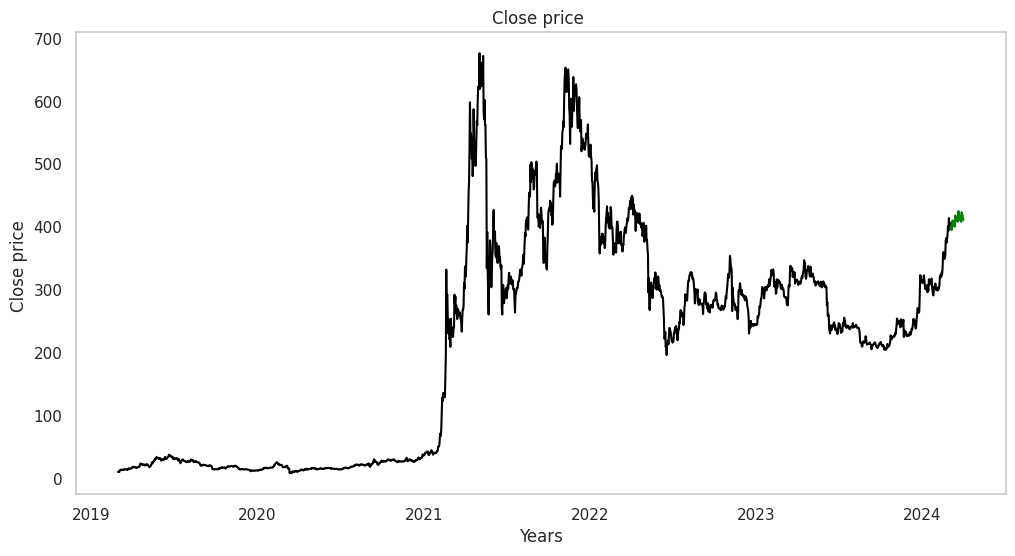

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(eth_df['Price'], color = 'black')
plt.plot(forecast_30, color = 'green')

# title and axis captions
plt.title("Close price ")
plt.ylabel("Close price ")
plt.xlabel('Years')

# add a grid
plt.grid()

plt.show()

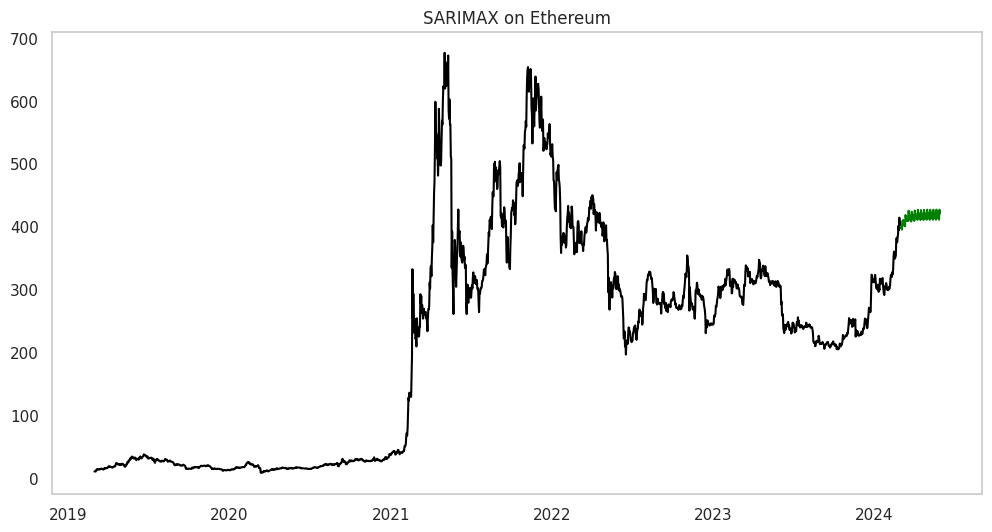

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(eth_df['Price'], color = 'black')
plt.plot(forecast_90, color = 'green')

# title and axis captions
#plt.title("Close price ")
#plt.ylabel("Close price ")
#plt.xlabel('Years')

# add a grid
plt.title("SARIMAX on Ethereum")
plt.grid()

plt.show()

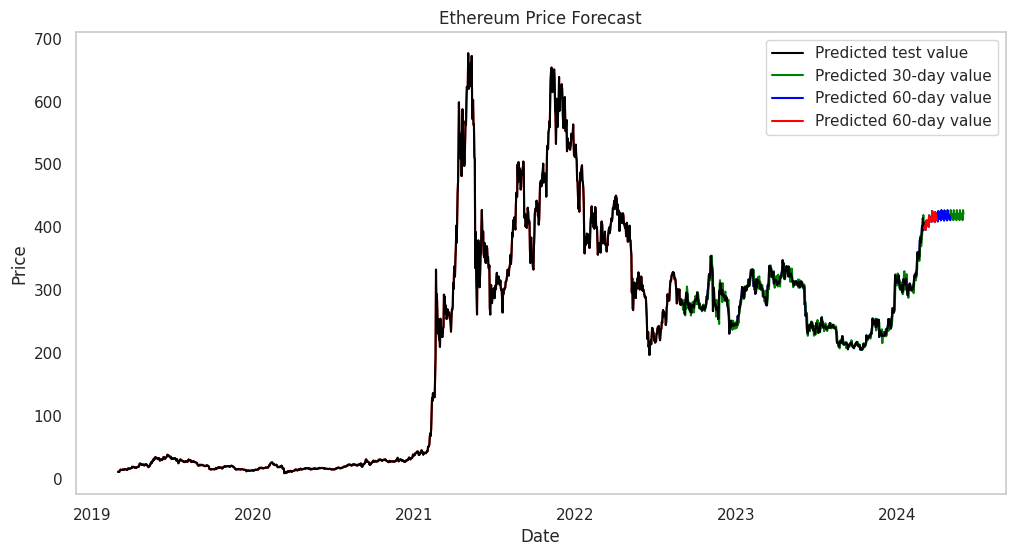

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(train, color = "red")
plt.plot(test, color = "blue")
plt.plot(predictions, color = "green")

# title and axis captions
plt.title("Train set, ")
plt.ylabel("Price")
plt.xlabel('Years')


plt.plot(eth_df['Price'], color = 'black', label='Predicted test value')
plt.plot(forecast_90, color = 'green', label='Predicted 30-day value')
plt.plot(forecast_60, color = 'blue', label='Predicted 60-day value')
plt.plot(forecast_30, color = 'red', label='Predicted 60-day value')

# title and axis captions
plt.title("Ethereum Price Forecast")
plt.ylabel("Price")
plt.xlabel('Date')

# add a legend
plt.legend()

# add a grid
plt.grid()

# display the plot
plt.show()


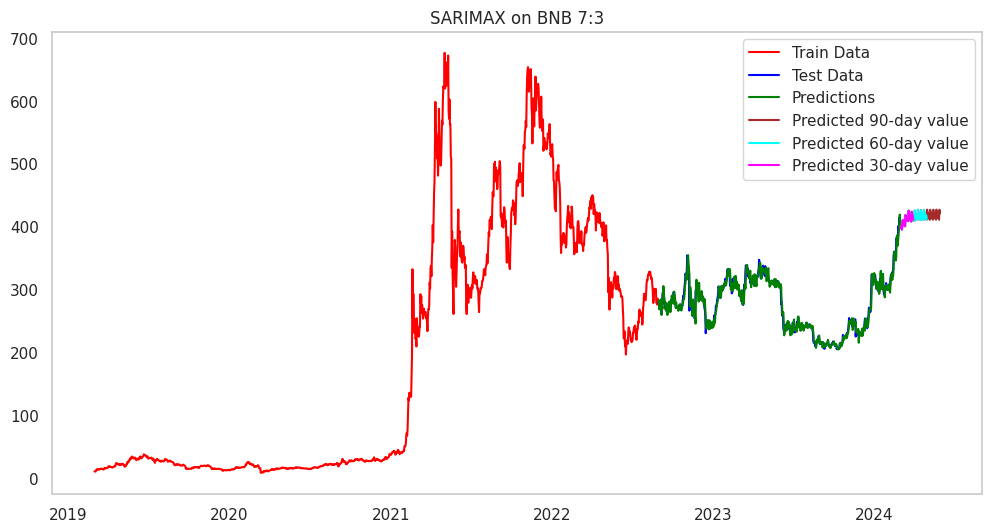

In [ ]:
plt.figure(figsize=(12, 6))

# Vẽ dữ liệu train, test và predictions
plt.plot(train, color = "red", label='Train Data')
plt.plot(test, color = "blue", label='Test Data')
plt.plot(predictions, color = "green", label='Predictions')

# Vẽ dữ liệu giá Ethereum và các dự báo
#plt.plot(eth_df['Price'], color = 'black', label='Actual Price')
plt.plot(forecast_90, color = 'brown', label='Predicted 90-day value')
plt.plot(forecast_60, color = 'cyan', label='Predicted 60-day value')
plt.plot(forecast_30, color = 'magenta', label='Predicted 30-day value')

# Thiết lập tiêu đề và nhãn cho trục
plt.title("SARIMAX on BNB 7:3")
#plt.ylabel("Price")
#plt.xlabel('Date')

# Thêm chú giải
plt.legend()

# Thêm lưới
plt.grid()

# Hiển thị biểu đồ
plt.show()


###Split data 8:2



In [ ]:
window_size = 10
feature_dim = 5

train_size = 0.8
test_size = 0.2

# model params
lstm_neurons = 20
rnn_neurons = 20
epochs = 100
batch_size = 4
loss = 'mae'
dropout = 0.25
optimizer = 'adam'

In [ ]:
train_index = int(len(eth_df)*train_size)
train_index

1462

In [ ]:
eth_df_train = eth_df.iloc[:train_index]
eth_df_test  = eth_df[train_index:]

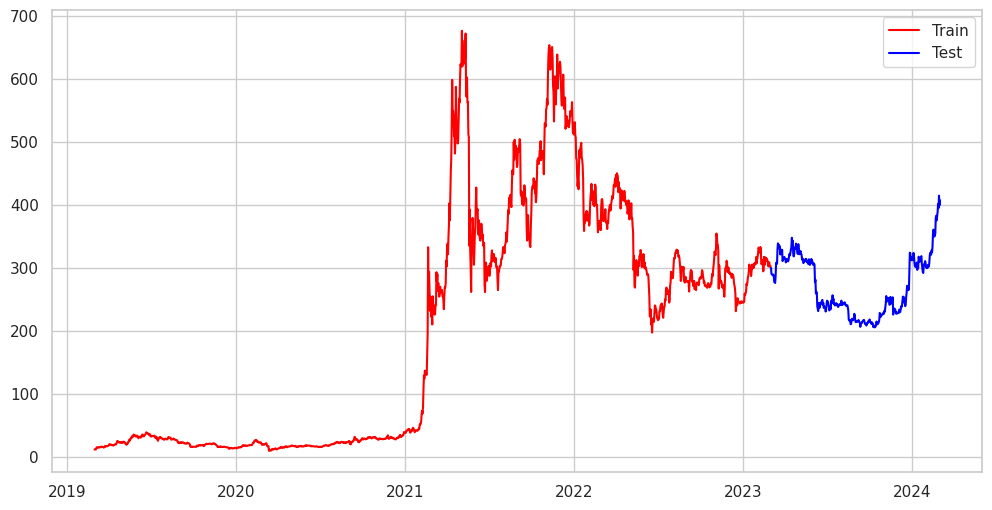

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(eth_df_train).index.to_list(), pd.DataFrame(eth_df_train['Price']), color='red', label='Train')
plt.plot(pd.DataFrame(eth_df_test).index.to_list(),pd.DataFrame(eth_df_test['Price']),color='blue' ,label ='Test')
plt.legend()
plt.show()

In [ ]:
eth_df['Price_diff'] = eth_df['Price'].diff(periods=7)
eth_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1828 entries, 2019-03-01 to 2024-03-01
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        1828 non-null   float64
 1   Open         1828 non-null   float64
 2   High         1828 non-null   float64
 3   Low          1828 non-null   float64
 4   Vol.         1828 non-null   float64
 5   Change %     1828 non-null   float64
 6   Price_diff   1821 non-null   float64
 7   month_index  1828 non-null   int32  
dtypes: float64(7), int32(1)
memory usage: 121.4 KB


In [ ]:
eth_df

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-01,11.35,10.27,11.55,10.24,4020000.0,0.1045,NaN,3
2019-03-02,11.75,11.35,11.80,10.83,3890000.0,0.0356,NaN,3
2019-03-03,11.45,11.75,11.86,11.20,2860000.0,-0.0258,NaN,3
2019-03-04,11.41,11.45,11.51,10.88,2740000.0,-0.0029,NaN,3
2019-03-05,13.65,11.40,13.74,11.40,8340000.0,0.1961,NaN,3
...,...,...,...,...,...,...,...,...
2024-02-26,401.60,388.50,404.49,382.10,1230000.0,0.0337,49.90,2
2024-02-27,394.80,401.60,403.69,390.11,932130.0,-0.0169,40.29,2
2024-02-28,414.62,394.60,426.79,394.30,1390000.0,0.0502,35.53,2


In [ ]:
eth_df['Price_diff'].fillna(method='backfill', inplace=True)

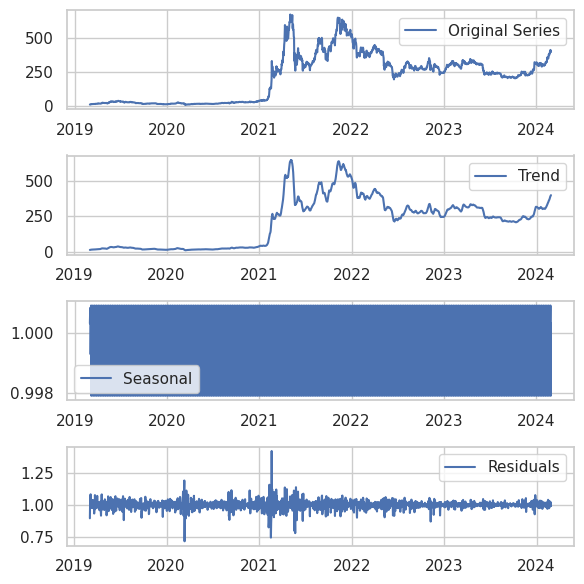

In [ ]:
result = seasonal_decompose(eth_df['Price'], model='multiplicative', period=7)
trend = result.trend.dropna()
seasonal = result.seasonal.dropna()
residual = result.resid.dropna()

# Plot the decomposed components
plt.figure(figsize=(6,6))

plt.subplot(4, 1, 1)
plt.plot(eth_df['Price'], label='Original Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()
# for fun i guess

In [ ]:
eth_df['month_index'] = eth_df.index.month
eth_df

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-01,11.35,10.27,11.55,10.24,4020000.0,0.1045,2.94,3
2019-03-02,11.75,11.35,11.80,10.83,3890000.0,0.0356,2.94,3
2019-03-03,11.45,11.75,11.86,11.20,2860000.0,-0.0258,2.94,3
2019-03-04,11.41,11.45,11.51,10.88,2740000.0,-0.0029,2.94,3
2019-03-05,13.65,11.40,13.74,11.40,8340000.0,0.1961,2.94,3
...,...,...,...,...,...,...,...,...
2024-02-26,401.60,388.50,404.49,382.10,1230000.0,0.0337,49.90,2
2024-02-27,394.80,401.60,403.69,390.11,932130.0,-0.0169,40.29,2
2024-02-28,414.62,394.60,426.79,394.30,1390000.0,0.0502,35.53,2


In [ ]:
df_monthly = eth_df.resample('M').mean()
df_monthly

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-31,14.959677,14.726129,15.253226,14.264194,3.721935e+06,0.018713,1.563871,3.0
2019-04-30,20.614333,20.463333,21.153667,19.689000,2.790667e+06,0.008660,1.350000,4.0
2019-05-31,26.913548,26.549677,27.769032,25.404194,3.359355e+06,0.014574,2.434194,5.0
2019-06-30,33.775333,33.800667,34.811000,32.650333,4.799000e+06,0.000087,0.433667,6.0
2019-07-31,30.068387,30.212258,31.141935,29.064839,3.515161e+06,-0.003690,-1.652903,7.0
...,...,...,...,...,...,...,...,...
2023-11-30,239.862333,239.832667,245.126000,234.689333,8.798903e+05,0.000637,1.136667,11.0
2023-12-31,259.653871,256.931613,263.784516,252.357097,1.038261e+06,0.010677,17.512581,12.0
2024-01-31,307.616774,308.002903,313.546129,300.821613,8.590026e+05,-0.000990,-0.954516,1.0


<Axes: xlabel='Date'>

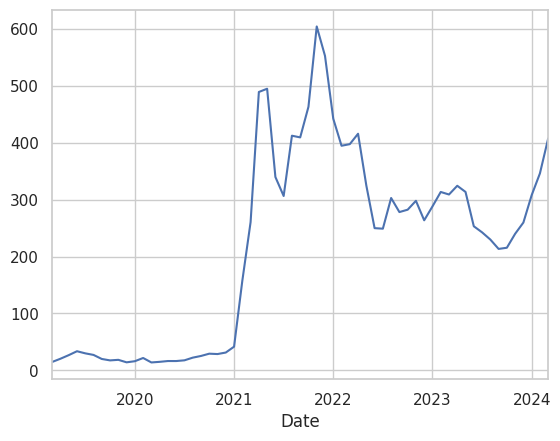

In [ ]:
df_monthly['Price'].plot()

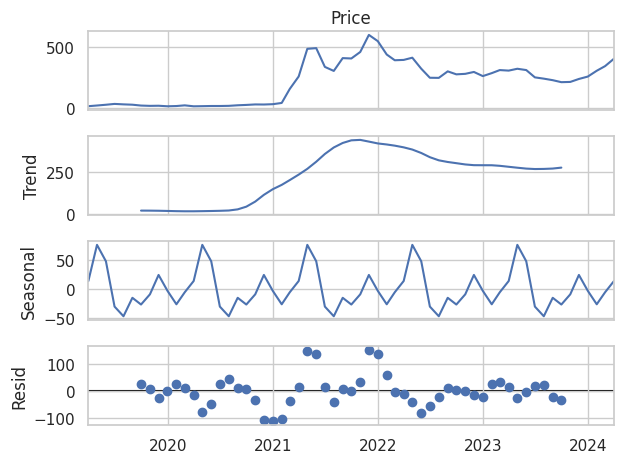

In [ ]:
decompose = seasonal_decompose(df_monthly['Price'])
decompose.plot()

plt.show()

In [ ]:
#import pmdarima as pm
#model = pm.auto_arima(df_monthly['Price'], trace = True,start_P=0, seasonal=True,exogenous=eth_df['month_index'],
					#	d=None, D=1,m=12,
				#		error_action='ignore',
					#	suppress_warnings=True,
				#		stepwise=True)

In [ ]:
import pmdarima as pm
model = pm.auto_arima(eth_df['Price'], trace = True,start_P=0, seasonal=True,exogenous=eth_df['month_index'],
						d=None, D=1,m=7,max_p=3, max_d=2, max_q=3,
						error_action='ignore',
						suppress_warnings=True,
						stepwise=True)

In [ ]:
train = eth_df_train['Price']
test = eth_df_test['Price']
start = len(train)
end = len(train) +len(test) -1
model_sarimax = sm.tsa.statespace.SARIMAX(eth_df['Price'],
                                          order = (4,0,1),
                                          seasonal_order = (2,1,0,7))
result = model_sarimax.fit()

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Price   No. Observations:                 1828
Model:             SARIMAX(4, 0, 1)x(2, 1, [], 7)   Log Likelihood               -7480.329
Date:                            Tue, 18 Jun 2024   AIC                          14976.658
Time:                                    08:58:04   BIC                          15020.715
Sample:                                03-01-2019   HQIC                         14992.912
                                     - 03-01-2024                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0627      0.227      4.690      0.000       0.619       1.507
ar.L2          0.0342      0.195      0.175      0.861      -0.349       0.417
ar.L3         -0.1270      0.050     -2.526      0.012      -0.226      -0.028
ar.L4         -0.0232      0.033     -0.698      0.485      -0.088       0.042
ma.L1         -0.2195      0.226     -0.972      0.331      -0.662       0.223
ar.S.L7       -0.6332      0.008    -77.959      0.000      -0.649      -0.617
ar.S.L14      -0.3781      0.009    -40.661      0.000      -0.396      -0.360
sigma2       215.9213      2.592     83.289      0.000     210.840     221.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             21347.80
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):              62.60   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
predictions = result.predict(start, end)
predictions

2023-03-02    290.205778
2023-03-03    298.612006
2023-03-04    296.052248
2023-03-05    292.486530
2023-03-06    282.094896
                 ...    
2024-02-26    385.596181
2024-02-27    397.512650
2024-02-28    405.949282
2024-02-29    419.510007
2024-03-01    399.697768
Freq: D, Name: predicted_mean, Length: 366, dtype: float64

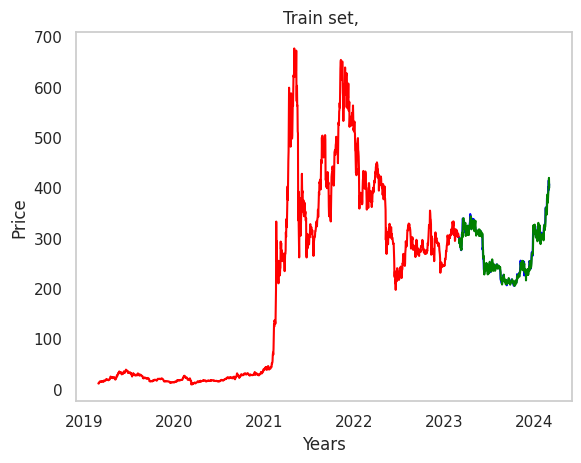

In [ ]:
plt.plot(train, color = "red")
plt.plot(test, color = "blue")
plt.plot(predictions, color = "green")

# title and axis captions
plt.title("Train set, ")
plt.ylabel("Price")
plt.xlabel('Years')

# add a grid
plt.grid()

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error


print('MAPE = ', mean_absolute_percentage_error(test, predictions))
print('MAE = ', mean_absolute_error(test, predictions))
print('RMSE = ', np.sqrt(mean_squared_error(test, predictions)))

MAPE =  0.019215145578253948
MAE =  5.348376222232042
RMSE =  7.6468332571410365


In [ ]:
start = len(eth_df)

end = (len(eth_df) - 1) + 30

forecast_30 = result.predict(start, end)

In [ ]:
start = len(eth_df)


end = (len(eth_df) - 1) + 60


forecast_60 = result.predict(start, end)

In [ ]:
start = len(eth_df)


end = (len(eth_df) - 1) + 90


forecast_90 = result.predict(start, end)

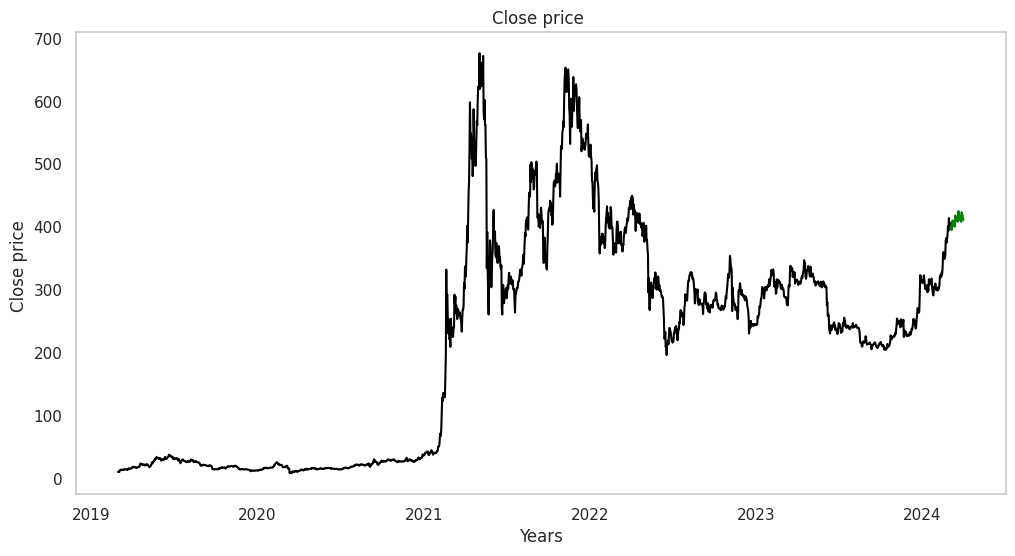

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(eth_df['Price'], color = 'black')
plt.plot(forecast_30, color = 'green')

# title and axis captions
plt.title("Close price ")
plt.ylabel("Close price ")
plt.xlabel('Years')

# add a grid
plt.grid()

plt.show()

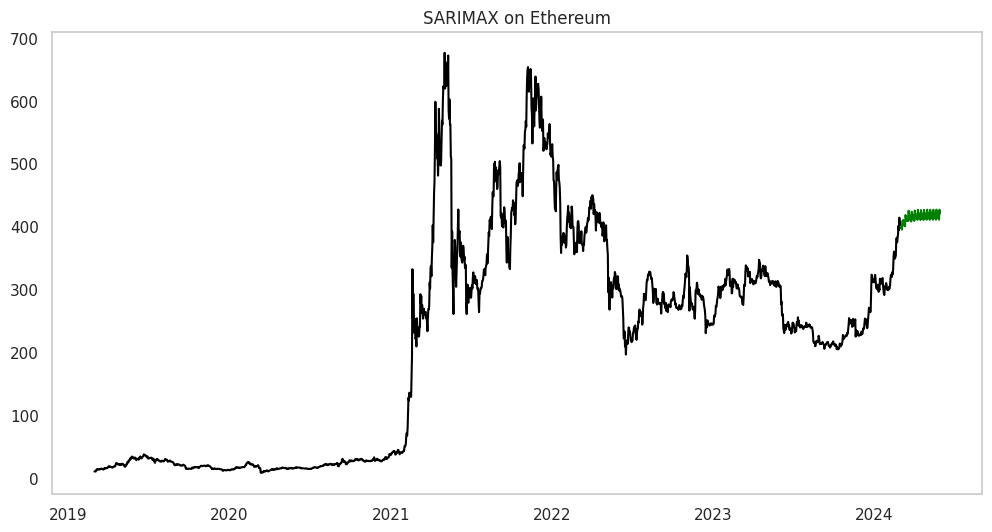

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(eth_df['Price'], color = 'black')
plt.plot(forecast_90, color = 'green')

# title and axis captions
#plt.title("Close price ")
#plt.ylabel("Close price ")
#plt.xlabel('Years')

# add a grid
plt.title("SARIMAX on Ethereum")
plt.grid()

plt.show()

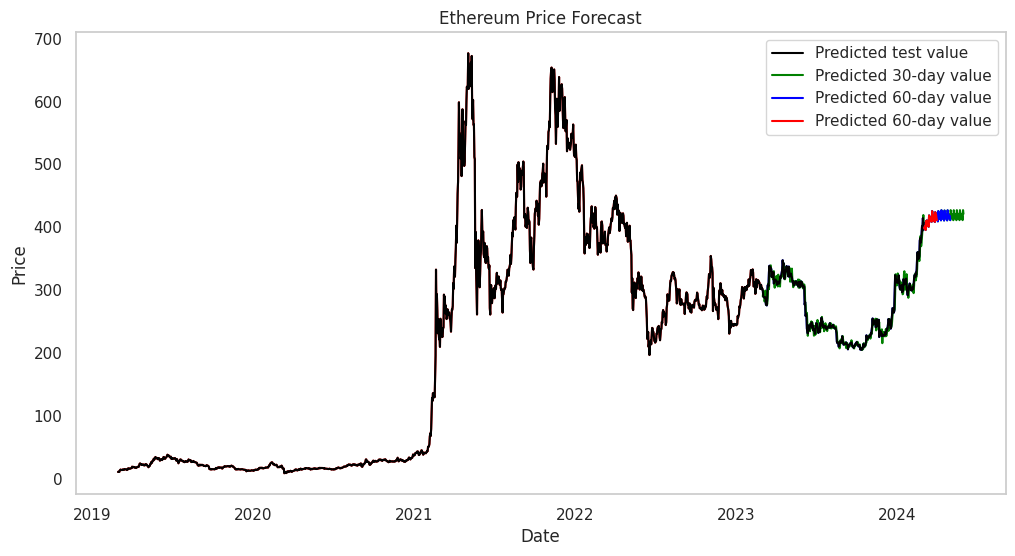

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(train, color = "red")
plt.plot(test, color = "blue")
plt.plot(predictions, color = "green")

# title and axis captions
plt.title("Train set, ")
plt.ylabel("Price")
plt.xlabel('Years')


plt.plot(eth_df['Price'], color = 'black', label='Predicted test value')
plt.plot(forecast_90, color = 'green', label='Predicted 30-day value')
plt.plot(forecast_60, color = 'blue', label='Predicted 60-day value')
plt.plot(forecast_30, color = 'red', label='Predicted 60-day value')

# title and axis captions
plt.title("Ethereum Price Forecast")
plt.ylabel("Price")
plt.xlabel('Date')

# add a legend
plt.legend()

# add a grid
plt.grid()

# display the plot
plt.show()


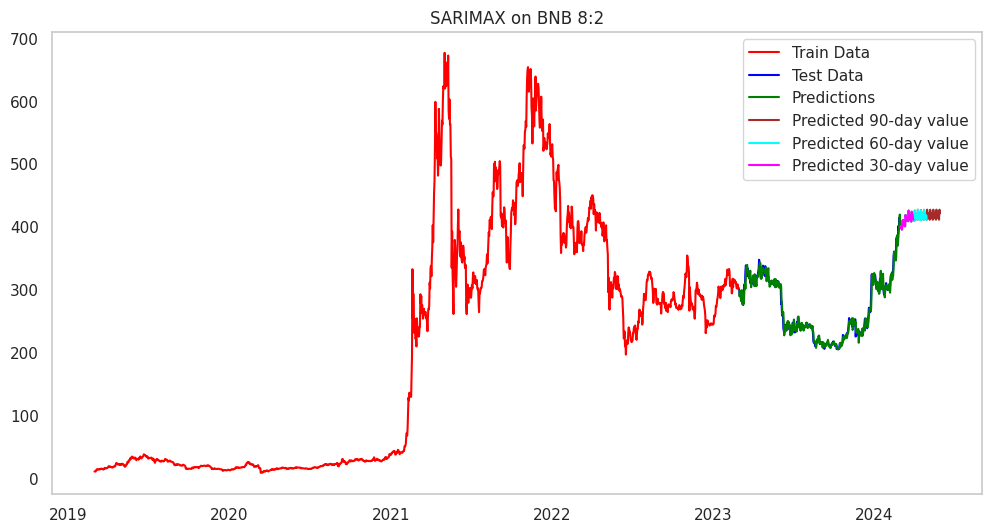

In [ ]:
plt.figure(figsize=(12, 6))

# Vẽ dữ liệu train, test và predictions
plt.plot(train, color = "red", label='Train Data')
plt.plot(test, color = "blue", label='Test Data')
plt.plot(predictions, color = "green", label='Predictions')

# Vẽ dữ liệu giá Ethereum và các dự báo
#plt.plot(eth_df['Price'], color = 'black', label='Actual Price')
plt.plot(forecast_90, color = 'brown', label='Predicted 90-day value')
plt.plot(forecast_60, color = 'cyan', label='Predicted 60-day value')
plt.plot(forecast_30, color = 'magenta', label='Predicted 30-day value')

# Thiết lập tiêu đề và nhãn cho trục
plt.title("SARIMAX on BNB 8:2")
#plt.ylabel("Price")
#plt.xlabel('Date')

# Thêm chú giải
plt.legend()

# Thêm lưới
plt.grid()

# Hiển thị biểu đồ
plt.show()


###Code lại

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from tqdm import tqdm_notebook
from itertools import product
from typing import Union

from IPython.display import display
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

RANDOM_SEED = np.random.seed(0)

In [ ]:
eth_df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-03-01,135.72,135.47,138.06,128.46,9730000.0,0.0018
2019-03-02,132.76,135.72,136.36,130.74,11290000.0,-0.0218
2019-03-03,131.01,132.77,168.42,129.05,10640000.0,-0.0132
2019-03-04,125.97,131.02,131.57,123.25,14110000.0,-0.0385
2019-03-05,136.82,125.97,141.11,125.44,16740000.0,0.0861
...,...,...,...,...,...,...
2024-05-28,3845.56,3894.33,3929.21,3775.08,436240.0,-0.0125
2024-05-29,3769.57,3845.56,3886.44,3745.72,353250.0,-0.0198
2024-05-30,3747.55,3767.22,3824.94,3703.74,293810.0,-0.0058


In [ ]:
eth_df['Price_diff'] = eth_df['Price'].diff(periods=12)
eth_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1920 entries, 2019-03-01 to 2024-06-01
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       1920 non-null   float64
 1   Open        1920 non-null   float64
 2   High        1920 non-null   float64
 3   Low         1920 non-null   float64
 4   Vol.        1920 non-null   float64
 5   Change %    1920 non-null   float64
 6   Price_diff  1908 non-null   float64
dtypes: float64(7)
memory usage: 120.0 KB


In [ ]:
eth_df['Price_diff'].fillna(method='backfill', inplace=True)


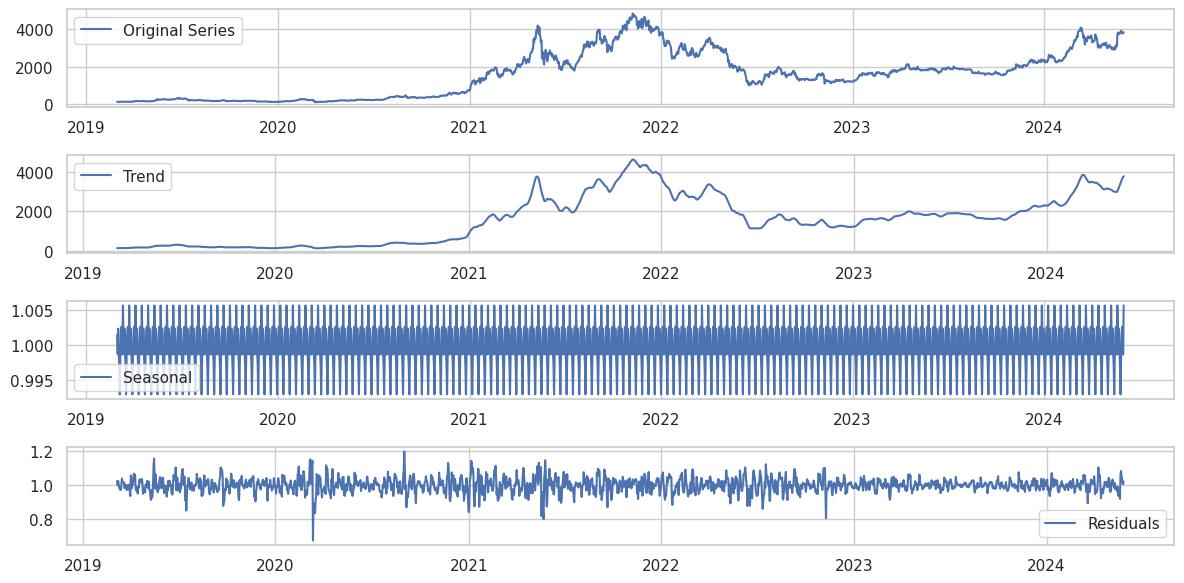

In [ ]:
result = seasonal_decompose(eth_df['Price'], model='multiplicative', period=12)
trend = result.trend.dropna()
seasonal = result.seasonal.dropna()
residual = result.resid.dropna()

# Plot the decomposed components
plt.figure(figsize=(12,6))

plt.subplot(4, 1, 1)
plt.plot(eth_df['Price'], label='Original Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
eth_df

,Price,Open,High,Low,Vol.,Change %,Price_diff
Date,,,,,,,
2019-03-01,135.72,135.47,138.06,128.46,9730000.0,0.0018,-3.75
2019-03-02,132.76,135.72,136.36,130.74,11290000.0,-0.0218,-3.75
2019-03-03,131.01,132.77,168.42,129.05,10640000.0,-0.0132,-3.75
2019-03-04,125.97,131.02,131.57,123.25,14110000.0,-0.0385,-3.75
2019-03-05,136.82,125.97,141.11,125.44,16740000.0,0.0861,-3.75
...,...,...,...,...,...,...,...
2024-05-28,3845.56,3894.33,3929.21,3775.08,436240.0,-0.0125,900.57
2024-05-29,3769.57,3845.56,3886.44,3745.72,353250.0,-0.0198,676.82
2024-05-30,3747.55,3767.22,3824.94,3703.74,293810.0,-0.0058,624.68


In [ ]:
eth_df['Date_index'] = eth_df.index.date


In [ ]:
SARIMAX_model = pm.auto_arima(eth_df[['Price']], exogenous=eth_df[['Date_index']],
						start_p=1, start_q=1,
						test='adf',
						max_p=3, max_q=3, m=12,
						start_P=0, seasonal=True,
						d=None, D=1,
						trace=False,
						error_action='ignore',
						suppress_warnings=True,
						stepwise=True)


KeyboardInterrupt: 

In [ ]:
X_train_SARIMAX = X_train_scale
y_train_SARIMAX = y_train_scale

X_test_SARIMAX  = X_test_scale
y_test_SARIMAX = y_test_scale

In [ ]:
model_sarimax = sm.tsa.statespace.SARIMAX(eth_df['Price'],
                                          order = (2,0,0),
                                          seasonal_order = (2,1,0,12))
model_sarimax_fit = model_sarimax.fit(y_train_SARIMAX)
model_fit = model_sarimax.fit()



In [ ]:
pred_test_SARIMAX = model_fit.predict(steps=576)
pred_30_ARIMA = model_fit.predict(steps = 30)
pred_60_ARIMA = model_fit.predict(steps = 60)
pred_90_ARIMA = model_fit.predict(steps = 90)

In [ ]:
# Tiếp tục với dự đoán
y_pred_test_SARIMAX = model_fit.predict()

In [ ]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

In [ ]:
y_pred_test_Sarimax = model_fit.predict(y_test_SARIMAX, pred_test_SARIMAX)
mape_test_Sarimax = mean_absolute_percentage_error(y_test_SARIMAX, y_pred_test_Sarimax)
mae_test_Sarimax = mean_absolute_error(y_test_SARIMAX, y_pred_test_Sarimax)
rmse_test_Sarimax = root_mean_squared_error(y_test_SARIMAX, y_pred_test_Sarimax)

print("Test Set MAPE: ", mape_test_Sarimax)
print("Test Set MAE: ", mae_test_Sarimax)
print("Test Set RMSE: ", rmse_test_Sarimax)

TypeError: Cannot convert input [Date
2022-04-26    0.574946
2022-04-27    0.591661
2022-04-28    0.601877
2022-04-29    0.576273
2022-04-30    0.557237
                ...   
2024-05-28    0.795166
2024-05-29    0.778999
2024-05-30    0.774315
2024-05-31    0.777529
2024-06-01    0.788866
Name: Price, Length: 768, dtype: float64] of type <class 'pandas.core.series.Series'> to Timestamp

In [ ]:
#history = SARIMAX_model.fit(
    y_train_SARIMAX, epochs=epochs, batch_size=batch_size, verbose=0, shuffle=True)

In [ ]:
#pred_test_SARIMAX = SARIMAX_model.predict(steps=len(y_test_SARIMAX))
pred_30_SARIMAX = model_fit.predict(steps = 50)
#pred_60_SARIMAX = SARIMAX_model.predict(steps = 60)
#red_90_SARIMAX = SARIMAX_model.predict(steps = 90)

In [ ]:
X_train_SARIMAX = X_train_scale.values.reshape((X_train_scale.shape[0], 1, X_train_scale.shape[1]))
y_test_SARIMAX  = y_test_scale.values

X_test_SARIMAX  = X_test_scale.values.reshape((X_test_scale.shape[0], 1, X_test_scale.shape[1]))
y_train_SARIMAX  = y_train_scale.values

In [ ]:
y_test_scale.shape

(768,)

In [ ]:
pred_30_SARIMAX.shape

(1920,)

ValueError: x and y must have same first dimension, but have shapes (90,) and (10, 1)

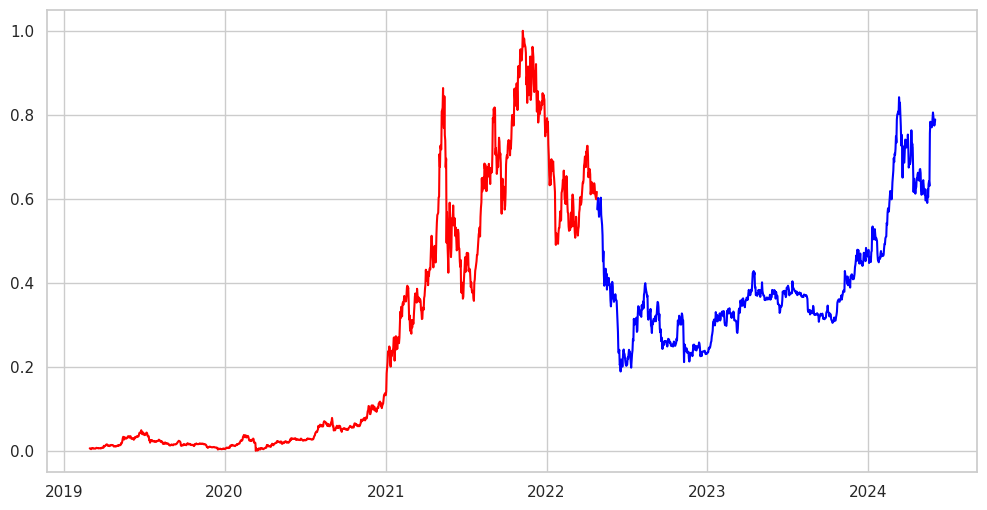

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(pd.DataFrame(y_train_scale).index.to_list(),pd.DataFrame(y_train_SARIMAX),color='red',label='Train value')
plt.plot(pd.DataFrame(y_test_scale).index.to_list(), pd.DataFrame(y_test_SARIMAX), color='blue', label='Test value')
#plt.plot(pd.DataFrame(y_test_scale).index.to_list(), pd.DataFrame(pred_test_SARIMAX), color='green', label='Predicted test value')
#plt.plot(pd.DataFrame(y_30_scale).index.to_list(), pd.DataFrame(pred_30_SARIMAX), color='magenta', label='Predicted 30 day value')
#plt.plot(pd.DataFrame(y_60_scale).index.to_list(), pd.DataFrame(pred_60_SARIMAX), color='cyan', label='Predicted 60 day value')
plt.plot(pd.DataFrame(y_90_scale).index.to_list(), pd.DataFrame(pred_90_SARIMAX), color='brown', label='Predicted 90 day value')
plt.title(f"Running SARIMAX on Ethereum with 6:4")
plt.legend()
plt.show()

###SARIMAX

In [ ]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

from statsmodels.tsa.stattools import adfuller
!pip install pmdarima -q
import pmdarima as pm
from statsmodels.tsa.seasonal import seasonal_decompose

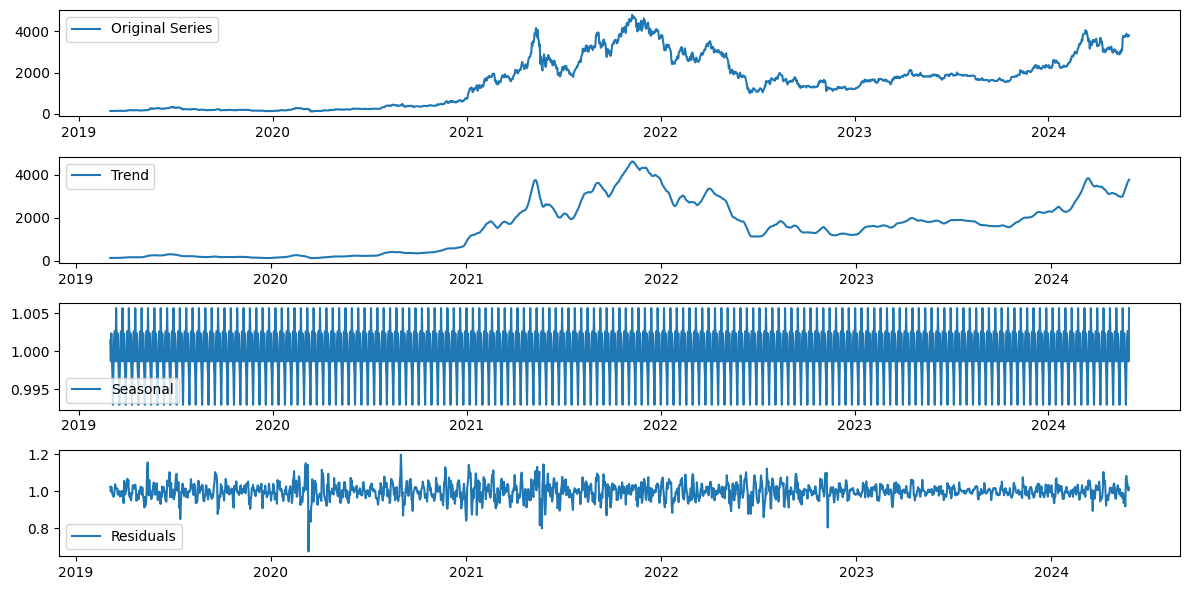

In [ ]:
result = seasonal_decompose(eth_df['Price'], model='multiplicative', period=12)
trend = result.trend.dropna()
seasonal = result.seasonal.dropna()
residual = result.resid.dropna()

# Plot the decomposed components
plt.figure(figsize=(12,6))

plt.subplot(4, 1, 1)
plt.plot(eth_df['Price'], label='Original Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
y_train_scale

Date
2019-03-01    0.005919
2019-03-02    0.005289
2019-03-03    0.004917
2019-03-04    0.003844
2019-03-05    0.006153
                ...   
2022-04-21    0.611863
2022-04-22    0.607406
2022-04-23    0.600790
2022-04-24    0.598690
2022-04-25    0.616563
Name: Price, Length: 1152, dtype: float64

In [ ]:
#Model Fitting
SARIMAX_model = pm.auto_arima( y_train_scale,
						start_p=1, start_q=1,
						max_p=3, max_q=3, m=12,
						start_P=0, seasonal=True,
						d=None, D=1,
						trace=False,
						error_action='ignore',
						suppress_warnings=True,
						stepwise=True)

KeyboardInterrupt: 

In [ ]:
# Define the target variable
target = 'Price'

In [ ]:
# Split data into features and target
X_train = eth_df_train_scaled.drop(columns=target).values
y_train = eth_df_train_scaled[target]

X_test = eth_df_test_scaled.drop(columns=target).values
y_test = eth_df_test_scaled[target]

In [ ]:
print(SARIMAX_model.summary())

In [ ]:

# Tiếp tục với dự đoán
y_pred_test_SARIMAX = SARIMAX_model.predict()

In [ ]:
X_train_SARIMAX = X_train_scale.values.reshape((X_train_scale.shape[0], 1, X_train_scale.shape[1]))
y_test_SARIMAX  = y_test_scale.values

X_test_SARIMAX  = X_test_scale.values.reshape((X_test_scale.shape[0], 1, X_test_scale.shape[1]))
y_train_SARIMAX  = y_train_scale.values

In [ ]:
X_30_SARIMAX = X_30_scale.values.reshape((X_30_scale.shape[0], 1, X_30_scale.shape[1]))
X_60_SARIMAX = X_60_scale.values.reshape((X_60_scale.shape[0], 1, X_60_scale.shape[1]))
X_90_SARIMAX = X_90_scale.values.reshape((X_90_scale.shape[0], 1, X_90_scale.shape[1]))

In [ ]:
X_train_SARIMAX = X_train_scale
y_train_SARIMAX = y_train_scale

X_test_SARIMAX  = X_test_scale
y_test_SARIMAX = y_test_scale

In [ ]:
# Evaluate model on test set
mape_test_lr = mean_absolute_percentage_error(y_test, y_pred_test_SARIMAX)
mae_test_lr = mean_absolute_error(y_test, y_pred_test_SARIMAX)
rmse_test_lr = root_mean_squared_error(y_test, y_pred_test_SARIMAX)

print("Test Set MAPE: ", mape_test_lr)
print("Test Set MAE: ", mae_test_lr)
print("Test Set RMSE: ", rmse_test_lr)

In [ ]:
X_30_scale = eth_df_30_scaled.drop(columns=['Price'])
y_30_scale = eth_df_30_scaled['Price']

X_60_scale = eth_df_60_scaled.drop(columns=['Price'])
y_60_scale = eth_df_60_scaled['Price']

X_90_scale = eth_df_90_scaled.drop(columns=['Price'])
y_90_scale = eth_df_90_scaled['Price']




In [ ]:
X_30_SARIMAX = X_30_scale
X_60_SARIMAX = X_60_scale
X_90_SARIMAX = X_90_scale

In [ ]:
pred_test_SARIMAX = SARIMAX_model.predict(X_test_scale)
pred_30_SARIMAX = SARIMAX_model.predict()
pred_60_SARIMAX = SARIMAX_model.predict()
pred_90_SARIMAX = SARIMAX_model.predict()

In [ ]:
def sarimax_forecast(SARIMAX_model, periods=24):
	# Forecast
	n_periods = periods

	forecast_df = pd.DataFrame({"Date": pd.date_range(eth_df.index[-1], periods=n_periods, freq='MS').month},
							index=pd.date_range(eth_df.index[-1] + pd.DateOffset(months=1), periods=n_periods, freq='MS'))

	fitted, confint = SARIMAX_model.predict(n_periods=n_periods,
											return_conf_int=True,
											exogenous=forecast_df[['Date']])
	index_of_fc = pd.date_range(eth_df.index[-1] + pd.DateOffset(months=1), periods=n_periods, freq='MS')

	# make series for plotting purpose
	fitted_series = pd.Series(fitted, index=index_of_fc)
	lower_series = pd.Series(confint[:, 0], index=index_of_fc)
	upper_series = pd.Series(confint[:, 1], index=index_of_fc)

	# Plot
	plt.figure(figsize=(15, 7))
	plt.plot(eth_df["Price"], color='#1f76b4')
	plt.plot(fitted_series, color='darkgreen')
	plt.fill_between(lower_series.index,
					lower_series,
					upper_series,
					color='k', alpha=.15)

	plt.title("SARIMAX - Forecast of Airline Passengers")
	plt.show()



In [ ]:
sarimax_forecast(SARIMAX_model, periods=24)


In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(pd.DataFrame(y_train_scale).index.to_list(),pd.DataFrame(y_train_SARIMAX),color='red',label='Train value')
plt.plot(pd.DataFrame(y_test_scale).index.to_list(), pd.DataFrame(y_test_SARIMAX), color='blue', label='Test value')
plt.plot(pd.DataFrame(y_test_scale).index.to_list(), pd.DataFrame(pred_test_SARIMAX.reshape(-1)), color='green', label='Predicted test value')
plt.plot(pd.DataFrame(y_30_scale).index.to_list(),pd.DataFrame(pred_30_SARIMAX.reshape(-1)),color='magenta')
plt.plot(pd.DataFrame(y_60_scale).index.to_list(), pd.DataFrame(pred_60_SARIMAX.reshape(-1)), color='cyan', label='Predicted 60-day value')
plt.plot(pd.DataFrame(y_90_scale).index.to_list(), pd.DataFrame(pred_90_SARIMAX.reshape(-1)), color='brown', label='Predicted 90-day value')
plt.title("Linear Regression on Bitcoin")
plt.legend()
plt.show()

###Draft

In [ ]:
X_30_SARIMAX = X_30_scale.values.reshape((X_30_scale.shape[0], 1, X_30_scale.shape[1]))
X_60_SARIMAX = X_60_scale.values.reshape((X_60_scale.shape[0], 1, X_60_scale.shape[1]))
X_90_SARIMAX = X_90_scale.values.reshape((X_90_scale.shape[0], 1, X_90_scale.shape[1]))

In [ ]:
y_train_SARIMAX = y_train_scale

y_test_SARIMAX = y_test_scale

In [ ]:
pred_test_SARIMAX = SARIMAX_model.predict(steps=len(y_test_SARIMAX))
pred_30_SARIMAX = SARIMAX_model.predict(steps = 30)
pred_60_SARIMAX = SARIMAX_model.predict(steps = 60)
pred_90_SARIMAX = SARIMAX_model.predict(steps = 90)

In [ ]:
def sarimax_forecast(SARIMAX_model, periods=24):
	# Forecast
	n_periods = periods

	forecast_df = pd.DataFrame({"Date_index": pd.date_range(eth_df.index[-1], periods=n_periods, freq='MS').month},
							index=pd.date_range(eth_df.index[-1] + pd.DateOffset(months=1), periods=n_periods, freq='MS'))

	fitted, confint = SARIMAX_model.predict(n_periods=n_periods,
											return_conf_int=True,
											exogenous=forecast_df[['Date_index']])
	index_of_fc = pd.date_range(eth_df.index[-1] + pd.DateOffset(months=1), periods=n_periods, freq='MS')

	# make series for plotting purpose
	fitted_series = pd.Series(fitted, index=index_of_fc)
	lower_series = pd.Series(confint[:, 0], index=index_of_fc)
	upper_series = pd.Series(confint[:, 1], index=index_of_fc)

	# Plot
	plt.figure(figsize=(15, 7))
	plt.plot(eth_df["Price"], color='#1f76b4')
	plt.plot(fitted_series, color='darkgreen')
	plt.fill_between(lower_series.index,
					lower_series,
					upper_series,
					color='k', alpha=.15)

	plt.title("SARIMAX - Forecast of ETH")
	plt.show()


In [ ]:
print(SARIMAX_model.summary())

In [ ]:
model = SARIMAX(train_data, freq='MS', order=(1, 1, 1), seasonal_order=(1, 0, 0, 12))
model_fit = model.fit(disp=False)

In [ ]:
pred = model.predict(x_test)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(pred,y_test))

In [ ]:
X_30_SARIMAX = X_30_scale
X_60_SARIMAX = X_60_scale
X_90_SARIMAX = X_90_scale

In [ ]:
sarimax_forecast(SARIMAX_model, periods=24)


In [ ]:
pred_test_SARIMAX = SARIMAX_model.predict(X_test_SARIMAX)
pred_30_SARIMAX = model_SARIMAX.predict(X_30_SARIMAX)
pred_60_SARIMAX = model_SARIMAX.predict(X_60_SARIMAX)
pred_90_SARIMAX = model_SARIMAX.predict(X_90_SARIMAX)

TypeError: n_periods must be an int

In [ ]:
X_train_SARIMAX = X_train_scale.values.reshape((X_train_scale.shape[0], 1, X_train_scale.shape[1]))
y_test_SARIMAX  = y_test_scale.values

X_test_SARIMAX  = X_test_scale.values.reshape((X_test_scale.shape[0], 1, X_test_scale.shape[1]))
y_train_SARIMAX  = y_train_scale.values

###FINAL

In [ ]:
eth_df['Date'] = eth_df.index.day

In [ ]:
eth_df.head()

,Price,Open,High,Low,Vol.,Change %,Date
Date,,,,,,,
2019-03-01,135.72,135.47,138.06,128.46,9730000.0,0.0018,1
2019-03-02,132.76,135.72,136.36,130.74,11290000.0,-0.0218,2
2019-03-03,131.01,132.77,168.42,129.05,10640000.0,-0.0132,3
2019-03-04,125.97,131.02,131.57,123.25,14110000.0,-0.0385,4
2019-03-05,136.82,125.97,141.11,125.44,16740000.0,0.0861,5


In [ ]:
eth_df['Date_square'] = eth_df['Date']* eth_df['Date']
eth_df['Date_^3'] = eth_df['Date_square']*eth_df['Date']

In [ ]:
eth_df

,Price,Open,High,Low,Vol.,Change %,Date,Date_square,Date_^3
Date,,,,,,,,,
2019-03-01,135.72,135.47,138.06,128.46,9730000.0,0.0018,1,1,1
2019-03-02,132.76,135.72,136.36,130.74,11290000.0,-0.0218,2,4,8
2019-03-03,131.01,132.77,168.42,129.05,10640000.0,-0.0132,3,9,27
2019-03-04,125.97,131.02,131.57,123.25,14110000.0,-0.0385,4,16,64
2019-03-05,136.82,125.97,141.11,125.44,16740000.0,0.0861,5,25,125
...,...,...,...,...,...,...,...,...,...
2024-05-28,3845.56,3894.33,3929.21,3775.08,436240.0,-0.0125,28,784,21952
2024-05-29,3769.57,3845.56,3886.44,3745.72,353250.0,-0.0198,29,841,24389
2024-05-30,3747.55,3767.22,3824.94,3703.74,293810.0,-0.0058,30,900,27000


In [ ]:
eth_df['Price Dif'] = eth_df['Price'].diff(periods=12)
eth_df.info()

eth_df['Price Dif'].fillna(method='backfill', inplace=True)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1920 entries, 2019-03-01 to 2024-06-01
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        1920 non-null   float64
 1   Open         1920 non-null   float64
 2   High         1920 non-null   float64
 3   Low          1920 non-null   float64
 4   Vol.         1920 non-null   float64
 5   Change %     1920 non-null   float64
 6   Date         1920 non-null   int32  
 7   Date_square  1920 non-null   int32  
 8   Date_^3      1920 non-null   int32  
 9   Price Dif    1908 non-null   float64
dtypes: float64(7), int32(3)
memory usage: 142.5 KB


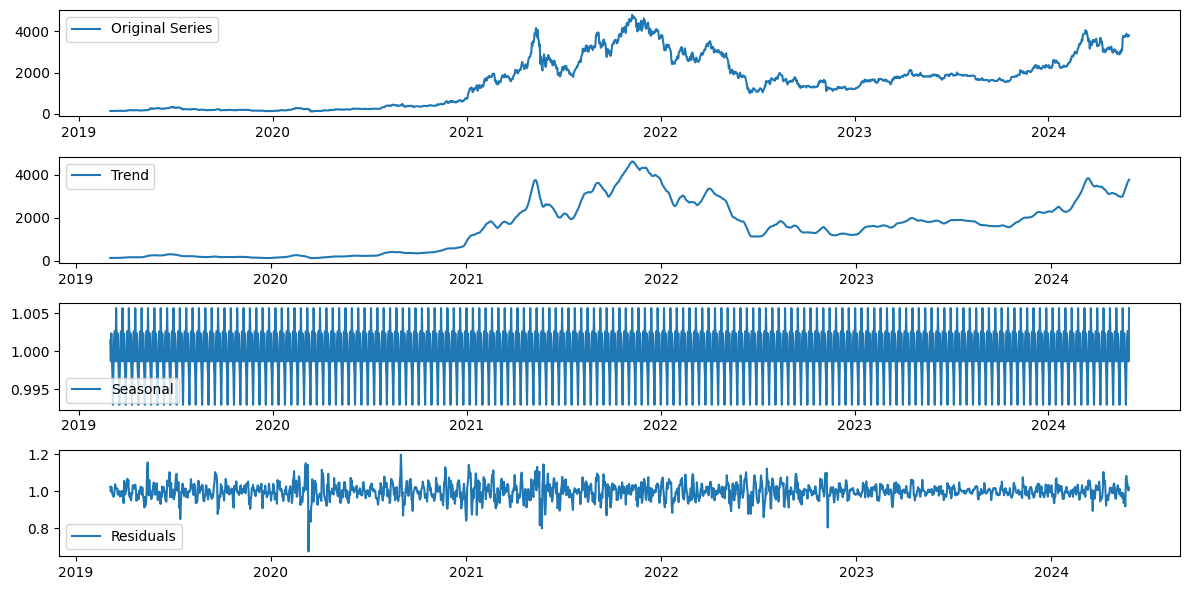

In [ ]:
result = seasonal_decompose(eth_df['Price'], model='multiplicative', period=12)
trend = result.trend.dropna()
seasonal = result.seasonal.dropna()
residual = result.resid.dropna()

# Plot the decomposed components
plt.figure(figsize=(12,6))

plt.subplot(4, 1, 1)
plt.plot(eth_df['Price'], label='Original Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import pmdarima as pm
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
Price_Arima = pm.auto_arima(eth_df['Price'], m=7, trace = True)
Price_Arima.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=22483.070, Time=29.85 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=22514.503, Time=0.25 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=22504.933, Time=1.59 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=22505.221, Time=1.66 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=22513.473, Time=0.09 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=22482.368, Time=21.92 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=22484.713, Time=6.70 sec
 ARIMA(2,1,2)(0,0,2)[7] intercept   : AIC=22481.910, Time=11.17 sec
 ARIMA(2,1,2)(1,0,2)[7] intercept   : AIC=22483.734, Time=18.15 sec
 ARIMA(1,1,2)(0,0,2)[7] intercept   : AIC=22507.411, Time=11.55 sec
 ARIMA(2,1,1)(0,0,2)[7] intercept   : AIC=22508.280, Time=8.78 sec
 ARIMA(3,1,2)(0,0,2)[7] intercept   : AIC=22483.405, Time=21.76 sec
 ARIMA(2,1,3)(0,0,2)[7] intercept   : AIC=22483.368, Time=20.27 sec
 ARIMA(1,1,1)(0,0,2)[7] intercept   : AIC=22508.549, Time=3.05 sec
 ARIMA(1,1,3

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1920
Model:             SARIMAX(2, 1, 2)x(0, 0, 2, 7)   Log Likelihood              -11233.259
Date:                           Mon, 17 Jun 2024   AIC                          22480.519
Time:                                   16:03:34   BIC                          22519.436
Sample:                               03-01-2019   HQIC                         22494.838
                                    - 06-01-2024                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3196      0.019    -16.822      0.000      -0.357      -0.282
ar.L2         -0.9058      0.019    -47.770      0.000      -0.943      -0.869
ma.L1          0.2547      0.019     13.535      0.000       0.218       0.292
ma.L2          0.9099      0.019     49.033      0.000       0.874       0.946
ma.S.L7       -0.0511      0.012     -4.130      0.000      -0.075      -0.027
ma.S.L14      -0.0376      0.014     -2.765      0.006      -0.064      -0.011
sigma2      7110.6173     89.365     79.568      0.000    6935.465    7285.769
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):             15820.09
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):              30.87   Skew:                            -0.63
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

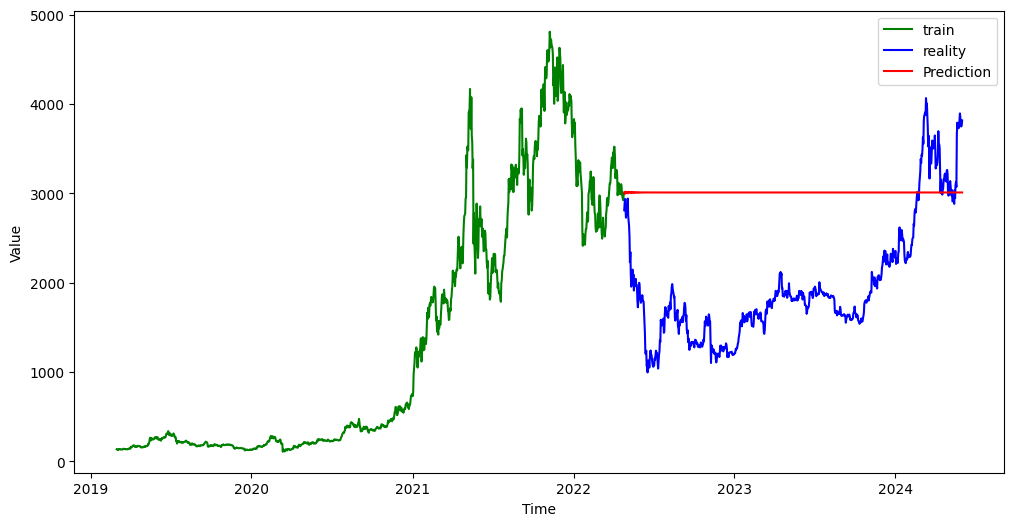

In [ ]:
#	SARIMAX(2, 1, 2)x(0, 0, 2, 7)
# ARIMA(2,1,2)(0,0,2)[7]
# order = (2,0,0), seasonal_order = (2,1,0,12))
n = int(len(eth_df)*0.6)
train = eth_df[:n]
test = eth_df[n:]
model = SARIMAX(train['Price'],order=(2,1,2),seasonal_order=(0,0,2,7))
result = model.fit()
start = len(train)
end = len(train) + len(test)-1
prediction = result.predict(start,end).rename('Prediction')
#ax=test['Gas Use '].plot(legend = True, figsize=(16,8))
#prediction.plot(legend = True)
plt.figure(figsize=(12, 6))
plt.plot( train['Price'], label='train', color='green')
plt.plot( test['Price'], label='reality', color='blue')
plt.plot( prediction, label='Prediction', color='red')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

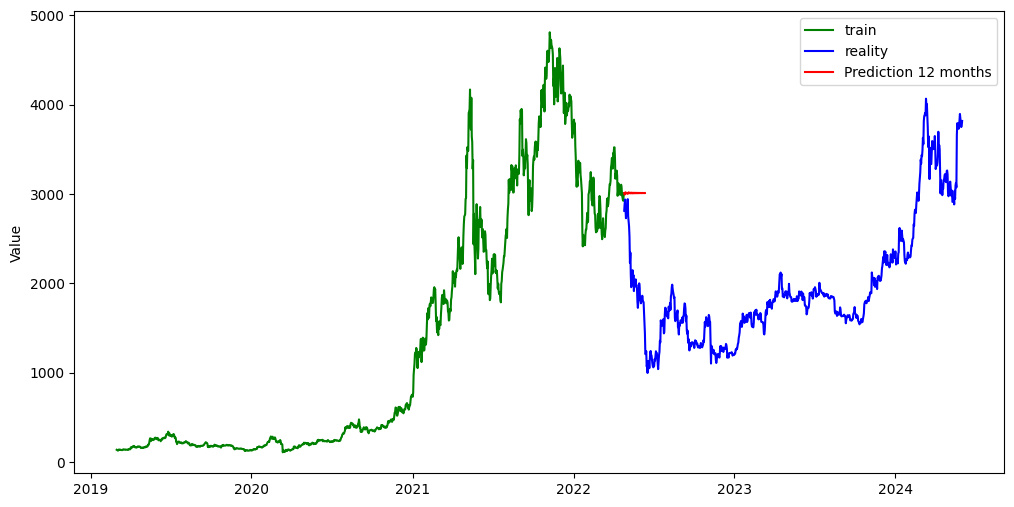

In [ ]:
pred = result.forecast(48)
plt.figure(figsize=(12, 6))
plt.plot( train['Price'], label='train', color='green')
plt.plot( test['Price'], label='reality', color='blue')
plt.plot( pred, label='Prediction 12 months', color='red')
plt.legend()
plt.ylabel('Value')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error

from math import  sqrt
mae = mean_absolute_error(test['Price'],prediction)
rmse = sqrt(mean_squared_error(test['Price'],prediction))
print("Mae: ",round(mae, 3))
print("RMSE: ",round(rmse, 3))

Mae:  1146.534
RMSE:  1242.612


###BITCON